# Introdução

O presente projeto tem como objetivo aplicar técnicas de **Deep Learning** para resolver um problema de **classificação multiclasse** utilizando redes neurais artificiais.  
O dataset escolhido, oriundo do **MABe Challenge – Social Action Recognition in Mice**, contém informações de vídeos de camundongos e respectivas anotações de comportamento. O foco é prever quais **ações** foram realizadas em um vídoe específico, além de determinar o intervalo de frames e ids dos camundongos envolvidos na ação.

## Grupo
**Caio Ortega Boa** , **Pedro Toledo Piza Civita**, **Gabriel Hermida de Melo Mendonca**

## Descrição do Dataset: MABe / CalMS21 — Mouse Behavior Detection

A competição utilizada como fonte deste projeto é **MABe — Mouse Behavior Detection** publicada no Kaggle:  
https://www.kaggle.com/competitions/MABe-mouse-behavior-detection/data

A base de dados é derivada do **dataset CalMS21 (Caltech Mouse Social Interactions 2021)**, utilizado no desafio MABe de reconhecimento de comportamentos sociais entre camundongos.

---

### Principais características

| Item | Descrição |
|---|---|
| **Tipo de problema** | Classificação multiclasse / frame-level behavior detection |
| **Domínio** | Comportamento social de camundongos a partir de dados de pose estimada |
| **Formato dos dados** | Sequências (vídeos) compostas por frames, onde cada frame contém: <br> - Coordenadas 2D de **7 keypoints** para cada um dos dois animais (residente e intruso) <br> - Anotações de comportamento (quando disponíveis) |
| **Escala / amplitude** | Mais de **6 milhões de frames não anotados** (dados de pose apenas), e mais de **1 milhão de frames anotados** para comportamentos sociais. - Considerando apenas o dataset de train, esse possui um shape de 8790, 38. |
| **Licença / distribuição** | O CalMS21 é distribuído sob **Creative Commons Attribution-NonCommercial-ShareAlike (CC-BY-NC-SA)**. |

---

### Justificativa para escolha deste dataset

- **Complexidade suficiente**: o dataset oferece um desafio realista, com muitas amostras e múltiplas classes, superando o mínimo exigido (≥ 1.000 amostras e ≥ 5 features).  
- **Originalidade**: não é uma base trivial ou já trivialmente explorada em cursos.  
- **Tipo de Dados**: as possibilidades de predição nesse dataset fragmentado despertaram interese em sua escolha.

## Explicação do Dataset

### Dataset Base

- **Identificação**
  - `lab_id` *(categórica)* — identificador do laboratório; chave para localização de anotações externas.
  - `video_id` *(numérica)* — identificador único do vídeo dentro do laboratório.

- **Atributos dos camundongos (até `mouse1`–`mouse4`)**
  - `mouse{n}_strain` *(categórica)* — linhagem declarada.
  - `mouse{n}_color` *(categórica)* — variação de cor.
  - `mouse{n}_sex` *(categórica)* — sexo.
  - `mouse{n}_id` *(numérica)* — identificador sequencial no estudo.
  - `mouse{n}_age` *(categórica)* — faixa etária aproximada.
  - `mouse{n}_condition` *(categórica)* — condição experimental aplicada.

- **Atributos do vídeo/arena**
  - `frames_per_second` *(numérica)* — taxa de quadros.
  - `video_duration_sec` *(numérica)* — duração em segundos.
  - `pix_per_cm_approx` *(numérica)* — aproximação de pixel→centímetro.
  - `video_width_pix`, `video_height_pix` *(numéricas)* — dimensões em pixels.
  - `arena_width_cm`, `arena_height_cm` *(numéricas)* — dimensões da arena.
  - `arena_shape`, `arena_type` *(categóricas)* — morfologia e tipo de arena.
  - `body_parts_tracked`, `behaviors_labeled` *(lista)* — keypoints e comportamentos disponíveis.
  - `tracking_method` *(categórica)* — método de captura de poses.

### Dataset de Tracking (identificados por diretórios)

- `video_frame` - frame do vídeo em questão
- `mouse_id` - id do rato analisado
- `bodypart` - parte do corpo analisada
- `x/y` - posição da parte do corpo analisada

### Dataset de Anotações (identificados por diretórios)

- `agent_id` - id do rato que realiza a ação
- `target_id` - id do rato que recebe a ação
- `action` - ação realizada no intervalo definido
- `[start/stop]_frame` - intervalo de frames em que ocorre a ação

# Definição do Modelo MLP e Funções Úteis

Nesta etapa do projeto foi construída a base para o modelo de classificação: um **Multi-Layer Perceptron (MLP)** implementado do zero em Python com `NumPy`.  
O objetivo é compreender todos os passos envolvidos no treinamento de uma rede neural, desde a preparação dos dados até o cálculo das métricas finais.

## Preparação do Ambiente

Foram importadas bibliotecas fundamentais para análise e manipulação de dados (`numpy`, `pandas`), visualização (`matplotlib`, `seaborn`), além de configurações para melhorar a exibição de tabelas no notebook.  

## Funções Auxiliares

Para viabilizar o treinamento e avaliação do modelo, foram definidas funções essenciais:

- **Normalização dos dados**: implementação do escalamento de variáveis para o intervalo [-1, 1], garantindo melhor estabilidade durante o treinamento da rede para `tanh`.  
- **Funções de ativação**: `tanh` e `softmax`, além de suas derivadas, necessárias para a propagação direta e retropropagação.  
- **Função de perda**: *Cross-Entropy Loss*, apropriada para classificação multiclasse, calculando o erro entre as probabilidades previstas e os rótulos verdadeiros.  
- **Métricas de avaliação**: `accuracy_score`, `f1_score`, `precision`, `recall` e `confusion_matrix` para medir a taxa de acertos do modelo.  
- **Divisão do dataset**: função `train_test_split`, que embaralha os dados e separa em treino e teste, garantindo reprodutibilidade via `random_state`.  
- **Inicialização de pesos**: método `xavier_init`, que favorece uma inicialização de pesos para propagação de gradiente mais estável em redes profundas.  
- **Codificação de rótulos**: função `one_hot`, que converte classes inteiras em vetores one-hot para uso na função de perda.

## Estrutura do MLP

A classe `MLP` reúne todos os componentes do modelo:

- **Hiperparâmetros configuráveis**: dimensões de entrada e saída, número e tamanho das camadas escondidas, taxa de aprendizado (`lr`), número de épocas, tamanho de lote (`batch_size`), regularização L2 e semente aleatória para reprodutibilidade.  
- **Inicialização de parâmetros**: pesos e vieses são inicializados com o método de Xavier, garantindo maior eficiência no início do treino.  
- **Forward pass**: realiza a propagação dos dados pelas camadas, aplicando `tanh` nas camadas escondidas e `softmax` na saída para gerar probabilidades.  
- **Backward pass**: implementa a retropropagação do erro, atualizando gradientes para pesos e vieses, com suporte a regularização L2.  
- **Função de atualização**: aplica descida do gradiente para refinar os parâmetros a cada iteração.  
- **Treinamento (`fit`)**: organiza o loop de épocas, realiza o embaralhamento dos dados, treino em mini-batches, cálculo da função de perda e registro histórico de loss e accuracy.  
- **Predição**: métodos para retornar probabilidades (`predict_proba`), scores lineares (`decision_function`) e rótulos finais (`predict`).

In [135]:
from __future__ import annotations

from pathlib import Path
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

sns.set_theme(style='whitegrid', context='notebook')
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)


In [136]:
# -----------------------------
# Ativações e derivadas
# -----------------------------
def tanh(z: np.ndarray) -> np.ndarray:
    return np.tanh(z)

def dtanh_from_a(a: np.ndarray) -> np.ndarray:
    return 1.0 - a**2

def softmax(Z: np.ndarray, axis: int = 0) -> np.ndarray:
    """
    Z: (K, m) -> aplica softmax por coluna (axis=0).
    Retorna prob. por classe, colunas somam 1.
    """
    Z_shift = Z - np.max(Z, axis=axis, keepdims=True)
    e = np.exp(Z_shift)
    return e / np.sum(e, axis=axis, keepdims=True)

def cross_entropy(y_true_oh: np.ndarray, y_prob: np.ndarray, eps: float = 1e-12) -> float:
    """
    y_true_oh: (m, K) one-hot
    y_prob   : (m, K) probabilidades (softmax)
    """
    y_prob = np.clip(y_prob, eps, 1.0 - eps)
    return float(-np.mean(np.sum(y_true_oh * np.log(y_prob), axis=1)))


# -----------------------------
# Métricas de avaliação
# -----------------------------

def accuracy_score(y_true: np.ndarray, y_pred_labels: np.ndarray) -> float:
    return float(np.mean(y_true == y_pred_labels))

def precision_recall_f1(y_true, y_pred, labels=None):
    """Calcula precisão, recall e F1 por classe do zero"""
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    metrics = {}
    for label in labels:
        tp = np.sum((y_pred == label) & (y_true == label))
        fp = np.sum((y_pred == label) & (y_true != label))
        fn = np.sum((y_pred != label) & (y_true == label))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1        = 2*precision*recall/(precision+recall) if (precision+recall) > 0 else 0.0
        metrics[label] = {"precision": precision, "recall": recall, "f1": f1}
    return metrics

def confusion_matrix_true(y_true, y_pred, labels=None):
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    cm = pd.DataFrame(0, index=labels, columns=labels)
    for yt, yp in zip(y_true, y_pred):
        cm.loc[yt, yp] += 1
    return cm


# -----------------------------
# Divisão treino/validação/teste
# -----------------------------

def train_test_split(
    X: np.ndarray,
    y: np.ndarray,
    test_size: float = 0.15,
    val_size: float = 0.15,
    random_state: int = 42,
):
    """Divide os dados em conjuntos de treino, validacao e teste (70/15/15 por padrao)."""
    if not (0.0 < test_size < 1.0) or not (0.0 < val_size < 1.0):
        raise ValueError('test_size e val_size devem estar entre 0 e 1.')
    if test_size + val_size >= 1.0:
        raise ValueError('A soma de test_size e val_size deve ser inferior a 1.')

    rng = np.random.default_rng(random_state)
    m = X.shape[0]
    idx = rng.permutation(m)

    m_test = max(1, int(round(test_size * m)))
    m_val = max(1, int(round(val_size * m)))

    total_requested = m_test + m_val
    if total_requested >= m:
        m_test = max(1, int(np.floor(test_size * m)))
        m_val = max(1, int(np.floor(val_size * m)))
        total_requested = m_test + m_val
        if total_requested >= m:
            raise ValueError('Nao ha exemplos suficientes para o particionamento desejado.')

    test_idx = idx[:m_test]
    val_idx = idx[m_test:m_test + m_val]
    train_idx = idx[m_test + m_val:]

    if train_idx.size == 0:
        raise ValueError('Conjunto de treino vazio; ajuste test_size/val_size.')

    return (
        X[train_idx],
        X[val_idx],
        X[test_idx],
        y[train_idx],
        y[val_idx],
        y[test_idx],
    )

# -----------------------------
# Inicialização do pesos
# -----------------------------

def xavier_init(fan_in: int, fan_out: int, rng: np.random.Generator) -> np.ndarray:
    std = np.sqrt(2.0 / (fan_in + fan_out))
    return rng.normal(0.0, std, size=(fan_out, fan_in))

# -----------------------------
# One Hot Encoding
# -----------------------------

def one_hot(y: np.ndarray, K: int) -> np.ndarray:
    """
    y: (m,) com rótulos inteiros [0..K-1]
    retorna: (m, K) one-hot
    """
    m = y.shape[0]
    Y = np.zeros((m, K), dtype=float)
    Y[np.arange(m), y.astype(int)] = 1.0
    return Y

In [137]:
class MLP:
    def __init__(
        self,
        input_dim: int,
        hidden_layers: List[int] = [16, 16],
        output_dim: int = 2,        
        lr: float = 0.05,
        max_epochs: int = 500,
        batch_size: Optional[int] = None,
        random_state: Optional[int] = 42,
        l2: float = 0.0,
        track_history: bool = True,
    ):
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.output_dim = output_dim
        self.lr = lr
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.random_state = random_state
        self.l2 = l2
        self.track_history = track_history

        self.params_ = None
        self.loss_history_: List[float] = []
        self.acc_history_: List[float] = []

    # ---------- initialization ----------
    def _init_params(self, rng: np.random.Generator) -> None:
        layer_sizes = [self.input_dim] + self.hidden_layers + [self.output_dim]
        W, b = [], []
        for l in range(1, len(layer_sizes)):
            fan_in = layer_sizes[l-1]
            fan_out = layer_sizes[l]
            W_l = xavier_init(fan_in, fan_out, rng)
            b_l = np.zeros((fan_out, 1))
            W.append(W_l)
            b.append(b_l)
        self.params_ = {"W": W, "b": b}

    # ---------- forward ----------
    def _forward(self, X: np.ndarray):
        W, B = self.params_["W"], self.params_["b"]
        A = X.T  
        caches = [{"A": A}]  

        # hidden layers
        for l in range(len(self.hidden_layers)):
            Z = W[l] @ A + B[l]
            A = tanh(Z)
            caches.append({"Z": Z, "A": A})

        # output layer (softmax)
        ZL = W[-1] @ A + B[-1]
        P = softmax(ZL, axis=0)
        caches.append({"Z": ZL, "A": P})
        return caches, P.T

    # ---------- backward ----------
    def _backward(self, caches, y: np.ndarray):
        W = self.params_["W"]
        L = len(W)
        m = y.shape[0]

        A0 = caches[0]["A"]
        A_list = [A0] + [c["A"] for c in caches[1:]]

        Y = one_hot(y.reshape(-1), self.output_dim).T
        P = A_list[-1]

        dZ = (P - Y) / m
        dW = [None] * L
        dB = [None] * L

        # última camada
        A_prev = A_list[-2]
        dW[L-1] = dZ @ A_prev.T
        dB[L-1] = np.sum(dZ, axis=1, keepdims=True)

        # ocultas
        for l in reversed(range(L-1)):
            dA = W[l+1].T @ dZ
            A_l = A_list[l+1]
            dZ = dA * dtanh_from_a(A_l)

            A_prev = A_list[l]
            dW[l] = dZ @ A_prev.T
            dB[l] = np.sum(dZ, axis=1, keepdims=True)

        if self.l2:
            reg_scale = self.l2 / m
            for l in range(L):
                dW[l] += reg_scale * W[l]

        return dW, dB

    # ---------- update ----------
    def _update(self, dW, dB, lr: float) -> None:
        for l in range(len(self.params_["W"])):
            self.params_["W"][l] -= lr * dW[l]
            self.params_["b"][l] -= lr * dB[l]

    # ---------- fit ----------
    def fit(self, X: np.ndarray, y: np.ndarray):
        rng = np.random.default_rng(self.random_state)
        self._init_params(rng)

        m = X.shape[0]
        batch_size = self.batch_size or m

        for epoch in range(1, self.max_epochs + 1):
            idx = rng.permutation(m)
            X_shuf = X[idx]
            y_shuf = y[idx]

            for start in range(0, m, batch_size):
                end = min(start + batch_size, m)
                Xb = X_shuf[start:end]
                yb = y_shuf[start:end]

                caches, _ = self._forward(Xb)
                dW, dB = self._backward(caches, yb)
                self._update(dW, dB, self.lr)

            if self.track_history:
                P_full = self.predict_proba(X)
                Y_full = one_hot(y, self.output_dim)
                loss = cross_entropy(Y_full, P_full)
                if self.l2:
                    reg = (self.l2 / (2 * m)) * sum(np.sum(W ** 2) for W in self.params_["W"])
                    loss += reg
                y_pred = np.argmax(P_full, axis=1)
                acc = accuracy_score(y, y_pred)
                self.loss_history_.append(loss)
                self.acc_history_.append(acc)

        return {"epochs_run": self.max_epochs}

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        _, P = self._forward(X)
        return P

    def decision_function(self, X: np.ndarray) -> np.ndarray:
        W, B = self.params_["W"], self.params_["b"]
        A = X.T
        for l in range(len(self.hidden_layers)):
            A = tanh(W[l] @ A + B[l])
        ZL = W[-1] @ A + B[-1]
        return ZL.T

    def predict(self, X: np.ndarray) -> np.ndarray:
        P = self.predict_proba(X)
        return np.argmax(P, axis=1)



## Pré-processamento de Features

Para alinhar corretamente os dados de treino e inferência, foi criada a classe `MainFeaturesPreprocessor`.  
Ela garante consistência no tratamento dos dados brutos de tracking e metadados, normalizando variáveis numéricas e codificando categorias.  

### Principais funcionalidades:

- **Normalização numérica**  
  - Cálculo de estatísticas básicas (média, mínimo, máximo) para cada coluna numérica.  
  - Escalonamento para o intervalo **[-1, 1]**, garantindo maior estabilidade ao treinamento da rede.  
  - Preenchimento de valores ausentes com a média da coluna.
  - Essa escolha foi feita porque a função de ativação utilizada no MLP (`tanh`) também opera nesse mesmo intervalo, reduzindo riscos de saturação e acelerando a convergência.   

- **Codificação categórica**  
  - Identificação dos níveis presentes em cada variável categórica.  
  - Transformação em variáveis dummy (one-hot encoding) com nomes sanitizados, evitando problemas com espaços ou caracteres especiais.  
  - Inclusão explícita de uma categoria `__missing__` para valores ausentes, assegurando que a ausência seja tratada como informação válida e não como erro.  
  - Essa decisão evita perda de amostras e mantém a consistência em casos de inferência com categorias ausentes no treino.  

- **Construção da matriz de features**  
  - Montagem de um `DataFrame` consolidado com colunas-chave (`lab_id`, `video_id`), atributos numéricos normalizados e categóricos codificados.  
  - Garantia de consistência entre diferentes fases (treino, validação e teste), mesmo quando há ausência de determinadas colunas.  

- **Tratamento de Colunas**
  - Colunas de `age` são tratadas separadamente através da média do intervalo para serem tratadas como numéricas.
  - Colunas de `condition` removidas, por gerarem colunas excessivas em one hot e agregar pouca informação.
  - Colunas de `mouse_id`, `behaviours_labeled` e `body_parts_tracked` não utilizadas como features, pois não agregam informação relevante, porém são utilizadas na construção de novas features e organização.

- **Métodos principais**  
  - `fit`: aprende estatísticas numéricas e níveis categóricos a partir de um `DataFrame`.  
  - `transform`: aplica a transformação aprendida a novos dados, preservando as colunas de features.  
  - `fit_transform`: combinação dos dois passos anteriores para conveniência.   


In [138]:
from __future__ import annotations
from typing import Dict, List
import re
import numpy as np
import pandas as pd

class MainFeaturesPreprocessor:
    """Custom feature processor used to align training and inference data."""
    key_columns = ['lab_id', 'video_id']
    keep_columns = ['mouse1_id', 'mouse2_id', 'mouse3_id', 'mouse4_id', 'body_parts_tracked', 'behaviors_labeled']
    drop_columns = ['mouse1_condition', 'mouse2_condition', 'mouse3_condition']

    def __init__(self):
        self.numeric_stats: Dict[str, Dict[str, float]] = {}
        self.categorical_levels: Dict[str, List[str]] = {}
        self.categorical_mode: Dict[str, str] = {}        
        self.feature_columns: List[str] = []
        self.age_columns = {'mouse1_age', 'mouse2_age', 'mouse3_age', 'mouse4_age'}

    @staticmethod
    def _sanitize_token(value) -> str:
        token = str(value).strip().lower().replace(' ', '_')
        cleaned = ''.join(ch if ch.isalnum() or ch == '_' else '_' for ch in token)
        cleaned = cleaned.strip('_')
        return cleaned or 'unknown'

    @staticmethod
    def _parse_age_to_float(series: pd.Series) -> pd.Series:
        def _parse_one(x) -> float:
            if pd.isna(x):
                return np.nan
            s = str(x)
            nums = re.findall(r'(\d+(?:\.\d+)?)', s)
            if not nums:
                return np.nan
            vals = [float(n) for n in nums]
            if len(vals) >= 2:
                return float((vals[0] + vals[1]) / 2.0)  
            return float(vals[0])                       
        return series.apply(_parse_one).astype(float)

    def _fit_numeric(self, series: pd.Series, column: str) -> None:
        values = pd.to_numeric(series, errors='coerce')
        valid = values.dropna()
        if valid.empty:
            self.numeric_stats[column] = {'fill': 0.0, 'min': 0.0, 'max': 0.0}
            return
        fill = float(valid.mean())
        min_val = float(valid.min())
        max_val = float(valid.max())
        self.numeric_stats[column] = {'fill': fill, 'min': min_val, 'max': max_val}

    def fit(self, df: pd.DataFrame) -> None:
        df_copy = df.copy()
        for column in df_copy.columns:
            if column in self.key_columns:
                continue
            if column in self.keep_columns:
                continue
            if column in self.drop_columns:
                df_copy = df_copy.drop(columns=[column])
                continue

            series = df_copy[column]

            if column in self.age_columns:
                parsed_age = self._parse_age_to_float(series)
                self._fit_numeric(parsed_age, column)
                continue

            if pd.api.types.is_numeric_dtype(series):
                self._fit_numeric(series, column)
            else:
                numeric_candidate = pd.to_numeric(series, errors='coerce')
                if numeric_candidate.notna().sum() >= len(series) * 0.5:
                    self._fit_numeric(numeric_candidate, column)
                else:
                    cats = series.dropna().astype(str)
                    if cats.empty:
                        levels = ['__missing__']
                        mode_val = '__missing__'
                    else:
                        levels = sorted(cats.unique().tolist())
                        mode_val = str(cats.mode().iloc[0])
                    self.categorical_levels[column] = levels
                    self.categorical_mode[column] = mode_val

        feature_matrix = self._build_matrix(df_copy)
        self.feature_columns = [c for c in feature_matrix.columns if c not in self.key_columns]

    def _scale_numeric(self, series: pd.Series, stats: Dict[str, float]) -> pd.Series:
        values = pd.to_numeric(series, errors='coerce')
        values = values.fillna(stats['fill'])
        min_val = stats['min']
        max_val = stats['max']
        if np.isclose(max_val, min_val):
            return pd.Series(0.0, index=series.index)
        scaled = (values - min_val) / (max_val - min_val)
        return 2.0 * scaled - 1.0

    def _encode_categorical(self, series: pd.Series, column: str) -> pd.DataFrame:
        levels = self.categorical_levels[column]
        mode_val = self.categorical_mode[column]

        processed = series.astype(str).fillna(mode_val)
        processed = processed.where(processed.isin(levels), mode_val)

        encoded = {}
        for level in levels:
            col_name = f"{column}_{self._sanitize_token(level)}"
            encoded[col_name] = (processed == level).astype(float)
        return pd.DataFrame(encoded, index=series.index)

    def _build_matrix(self, df: pd.DataFrame) -> pd.DataFrame:
        base_cols: Dict[str, pd.Series] = {}

        for key in self.key_columns:
            if key in df.columns:
                base_cols[key] = df[key]
            else:
                base_cols[key] = pd.Series(np.nan, index=df.index, name=key)

        for column, stats in self.numeric_stats.items():
            if column in df.columns:
                series = df[column]
                if column in self.age_columns:
                    series = self._parse_age_to_float(series)
            else:
                series = pd.Series(np.nan, index=df.index, name=column)
            base_cols[column] = self._scale_numeric(series, stats)

        matrix = pd.concat(base_cols, axis=1)

        cat_frames = []
        for column in self.categorical_levels:
            if column in df.columns:
                series = df[column]
            else:
                series = pd.Series(self.categorical_mode[column], index=df.index, name=column)
            encoded = self._encode_categorical(series, column)
            cat_frames.append(encoded)

        if cat_frames:
            matrix = pd.concat([matrix] + cat_frames, axis=1)

        return matrix.copy()


    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        if not self.numeric_stats and not self.categorical_levels:
            raise RuntimeError('Preprocessor is not fitted.')

        matrix = self._build_matrix(df.copy())

        final_cols = self.key_columns + self.feature_columns
        matrix = matrix.reindex(columns=final_cols, fill_value=0.0)

        return matrix.copy()

    def fit_transform(self, df: pd.DataFrame) -> pd.DataFrame:
        self.fit(df)
        return self.transform(df)

    def __repr__(self) -> str:
        return (
            f'TrackingFeaturePreprocessor(numeric={len(self.numeric_stats)}, '
            f'categorical={len(self.categorical_levels)}, '
            f'features={len(self.feature_columns)})'
        )


## Funções Auxiliares para Treinamento

- **`to_numpy_array`**  
  Converte diferentes formatos de dados (`np.ndarray`, `pandas.DataFrame`, listas) para `numpy.array`, assegurando compatibilidade com o modelo.  

- **`train_mlp_classifier`**  
  Facilita o treinamento de um MLP, encapsulando a preparação dos dados e a inicialização do modelo.  
  Permite especificar hiperparâmetros como número de camadas escondidas, taxa de aprendizado, regularização L2 e tamanho de lote.  

In [139]:
def to_numpy_array(obj, dtype=None):
    if isinstance(obj, np.ndarray):
        arr = obj
    elif hasattr(obj, 'to_numpy'):
        arr = obj.to_numpy()
    else:
        arr = np.array(obj)
    if dtype is not None:
        arr = arr.astype(dtype, copy=False)
    return arr

def train_mlp_classifier(X, y, hidden_layers, output_dim, *, lr=0.05, max_epochs=2000, batch_size=64, random_state=42, l2=0.0, track_history=True):
    X_np = to_numpy_array(X, dtype=np.float64)
    y_np = to_numpy_array(y, dtype=int)
    model = MLP(
        input_dim=X_np.shape[1],
        hidden_layers=hidden_layers,
        output_dim=output_dim,
        lr=lr,
        max_epochs=max_epochs,
        batch_size=batch_size,
        random_state=random_state,
        l2=l2,
        track_history=track_history,
    )
    model.fit(X_np, y_np)
    return model


## Estrutura de Diretórios e Carregamento dos Dados

Ao final, o código define caminhos candidatos para o dataset e carrega os arquivos principais:  

- **`train.csv`**: metadados com rótulos.  
- **`test.csv`**: metadados para submissão.  
- **`train_tracking`**: informações frame a frame de movimentos.  
- **`train_annotation`**: anotações detalhadas dos vídeos.  

In [ ]:
NOTEBOOK_ROOT = Path.cwd().resolve()
DATASET_CANDIDATES = [
    NOTEBOOK_ROOT / 'data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT / 'Data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT / 'ClassificationProject' / 'data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT / 'ClassificationProject' / 'Data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT.parent / 'data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT.parent / 'Data' / 'raw' / 'MABe-mouse-behavior-detection',
]
for cand in DATASET_CANDIDATES:
    if (cand / 'train.csv').exists():
        DATASET_DIR = cand
        break
else:
    raise FileNotFoundError('Não foi possivel localizar o diretório com train.csv')

ANNOTATION_DIR = DATASET_DIR / 'train_annotation'
TRACKING_DIR = DATASET_DIR / 'train_tracking'
TRAIN_PATH = DATASET_DIR / 'train.csv'
TEST_PATH = DATASET_DIR / 'test.csv'

train = pd.read_csv(TRAIN_PATH)
test_meta = pd.read_csv(TEST_PATH)

print('Diretório dos dados:', DATASET_DIR)
print('train.csv ->', train.shape)
display(train.head())


Diretório dos dados: C:\Users\cailu\OneDrive\Documentos\Work\Deep\ClassificationProject\data\raw\MABe-mouse-behavior-detection
train.csv -> (8790, 38)


,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,mouse2_sex,mouse2_id,mouse2_age,mouse2_condition,mouse3_strain,mouse3_color,mouse3_sex,mouse3_id,mouse3_age,mouse3_condition,mouse4_strain,mouse4_color,mouse4_sex,mouse4_id,mouse4_age,mouse4_condition,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,24.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,38.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,51.0,8-12 weeks,wireless device,30.0,615.6,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,male,17.0,8-12 weeks,NaN,CD-1 (ICR),white,male,31.0,8-12 weeks,NaN,CD-1 (ICR),white,male,44.0,8-12 weeks,NaN,25.0,3599.0,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,male,21.0,8-12 weeks,NaN,CD-1 (ICR),white,male,35.0,8-12 weeks,NaN,CD-1 (ICR),white,male,48.0,8-12 weeks,NaN,30.0,615.2,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,25.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,39.0,8-12 weeks,wireless device,NaN,NaN,NaN,NaN,NaN,NaN,30.0,619.7,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,male,28.0,8-12 weeks,NaN,CD-1 (ICR),white,male,42.0,8-12 weeks,NaN,NaN,NaN,NaN,NaN,8-12 weeks,NaN,30.0,602.6,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut


# Processamento de Anotações e Movimento

Este módulo implementa o **pipeline de pré-processamento de anotações** e **cálculo de métricas de movimento** a partir de dados de tracking.  
Ele consolida informações de múltiplos vídeos e laboratórios, garante consistência nas colunas, normaliza variáveis de tempo (frames) e calcula features de deslocamento.

---

### `load_annotation_events(annotation_root, metadata_df) -> pd.DataFrame`

Carrega todos os arquivos `.parquet` de anotações presentes em `annotation_root`, conforme listados em `metadata_df`.

**Etapas:**
- Procura `{annotation_root}/{lab_id}/{video_id}.parquet` para cada par (`lab_id`, `video_id`).
- Valida colunas obrigatórias: `agent_id`, `target_id`, `action`, `start_frame`, `stop_frame`.
- Anexa colunas `lab_id` e `video_id`.
- Concatena os arquivos encontrados em um único DataFrame.

---

### `_scale_to_minus_one_plus_one(series) -> pd.Series`

Escalona uma série numérica para o intervalo **[-1, 1]**.

**Comportamento:**
- Séries constantes ou nulas retornam zeros.
- Aplica min-max scaler em features numéricas.
- Compatível com funções de ativação `tanh`.

---

### `preprocess_annotations(annotations_df) -> pd.DataFrame`

Limpa e normaliza o conjunto de anotações carregado, preparando para utilização no modelo MLP.

**Etapas:**
- Verifica colunas obrigatórias.
- Remove `agent_id` e `target_id`.
- Aplica Scaler em varíaveis numéricas.
- Converte `action` para categórico.

---

### `_load_frame_movement_features(tracking_root, lab_id, video_id) -> pd.DataFrame | None`

Calcula movimentos realizados no dataset de tracking por frame.

**Processo:**
- Lê `{tracking_root}/{lab_id}/{video_id}.parquet` com colunas `mouse_id`, `bodypart`, `video_frame`, `x`, `y`.
- Ordena frames e calcula deslocamentos (`dx`, `dy`).
- Calcula distâncias euclidianas e agrega:
  - `movement_overall` — total por frame,
  - `movement_mouse{n}` — total por mouse,
  - `movement_mouse{n}_{junta}` — total por junta.
- Retorna DataFrame indexado por `video_frame` com zeros onde ausente.
- Usa cache `_frame_movement_cache` para evitar reprocessamento.

---

### `compute_segment_movement_totals(df, tracking_root, start_col='start_frame_raw', stop_col='stop_frame_raw') -> pd.DataFrame`

Soma os deslocamentos em cada segmento de frames correspondente a uma anotação.

**Etapas:**
- Agrupa por (`lab_id`, `video_id`).
- Carrega o tracking e fatiamento `[start_col, stop_col]` por anotação.
- Soma valores das colunas `movement_*` dentro do intervalo.
- Retorna DataFrame alinhado ao índice original, com uma coluna por feature de movimento.

In [141]:
def load_annotation_events(annotation_root: Path, metadata_df: pd.DataFrame) -> pd.DataFrame:
    """Carrega todas as anotações (.parquet) listadas em metadata_df."""
    expected_columns = {'agent_id', 'target_id', 'action', 'start_frame', 'stop_frame'}
    records = []
    missing_files = []
    for lab_id, video_id in metadata_df[['lab_id', 'video_id']].drop_duplicates().itertuples(index=False):
        annotation_path = annotation_root / lab_id / f"{video_id}.parquet"
        if not annotation_path.exists():
            missing_files.append((lab_id, video_id))
            continue
        df = pd.read_parquet(annotation_path)
        missing_cols = expected_columns.difference(df.columns)
        if missing_cols:
            raise ValueError(f'Arquivo {annotation_path} não contém colunas esperadas: {missing_cols}')
        df = df.assign(lab_id=lab_id, video_id=video_id)
        records.append(df)
    if not records:
        raise FileNotFoundError('Nenhum arquivo de anotação foi carregado.')
    annotations = pd.concat(records, ignore_index=True)
    if missing_files:
        print(f'Aviso: {len(missing_files)} arquivos de anotação não foram encontrados.')
    return annotations

def _scale_to_minus_one_plus_one(series: pd.Series) -> pd.Series:
    min_val = series.min()
    max_val = series.max()
    if pd.isna(min_val) or pd.isna(max_val) or np.isclose(min_val, max_val):
        return pd.Series(0.0, index=series.index)
    scaled = (series - min_val) / (max_val - min_val)
    return scaled * 2.0 - 1.0

def preprocess_annotations(annotations_df: pd.DataFrame) -> pd.DataFrame:
    """Remove colunas não utilizadas e normaliza frames por vídeo."""
    required_keys = {'lab_id', 'video_id', 'action', 'start_frame', 'stop_frame'}
    missing_keys = required_keys.difference(annotations_df.columns)
    if missing_keys:
        raise ValueError(f'Colunas obrigatórias ausentes: {missing_keys}')
    processed = annotations_df.drop(columns=['agent_id', 'target_id'], errors='ignore').copy()
    group_keys = ['lab_id', 'video_id']
    processed['start_frame_raw'] = processed['start_frame']
    processed['stop_frame_raw'] = processed['stop_frame']
    processed['start_frame'] = (
        processed.groupby(group_keys)['start_frame'].transform(_scale_to_minus_one_plus_one)
    )
    processed['stop_frame'] = (
        processed.groupby(group_keys)['stop_frame'].transform(_scale_to_minus_one_plus_one)
    )
    processed['action'] = processed['action'].astype('category')
    ordered_cols = ['lab_id', 'video_id', 'action', 'start_frame_raw', 'stop_frame_raw', 'start_frame', 'stop_frame']
    remaining_cols = [c for c in processed.columns if c not in ordered_cols]
    return processed[ordered_cols + remaining_cols]

In [ ]:
def min_max_scale_to_unit_interval(series: pd.Series, min_val: float, max_val: float, *, target_min: float = -1.0, target_max: float = 1.0) -> pd.Series:
    if pd.isna(min_val) or pd.isna(max_val) or np.isclose(max_val, min_val):
        return pd.Series(target_min, index=series.index, dtype=float)
    scaled = (series - min_val) / (max_val - min_val)
    scaled = scaled * (target_max - target_min) + target_min
    return scaled

from typing import Dict, Optional, Tuple, List

_frame_movement_cache: Dict[Tuple[str, str, str], Optional[pd.DataFrame]] = {}

def _load_frame_movement_features(tracking_root: Path, lab_id: str, video_id) -> Optional[pd.DataFrame]:
    """Retorna deslocamentos por frame para cada junta e agregados."""
    key = (str(tracking_root.resolve()), str(lab_id), str(video_id))
    if key in _frame_movement_cache:
        return _frame_movement_cache[key]
    path = tracking_root / str(lab_id) / f"{video_id}.parquet"
    if not path.exists():
        _frame_movement_cache[key] = None
        return None
    df_track = pd.read_parquet(path)
    required_cols = {'mouse_id', 'bodypart', 'video_frame', 'x', 'y'}
    if df_track.empty or not required_cols.issubset(df_track.columns):
        _frame_movement_cache[key] = None
        return None
    df_track = df_track.sort_values(['mouse_id', 'bodypart', 'video_frame'])
    df_track[['dx', 'dy']] = df_track.groupby(['mouse_id', 'bodypart'])[['x', 'y']].diff()
    df_track[['dx', 'dy']] = df_track[['dx', 'dy']].fillna(0.0)
    df_track['distance'] = np.sqrt(df_track['dx']**2 + df_track['dy']**2)
    frame_movement: Dict[str, pd.Series] = {}
    overall = df_track.groupby('video_frame')['distance'].sum().astype(float)
    frame_movement['movement_overall'] = overall
    for mouse_id, df_mouse in df_track.groupby('mouse_id'):
        try:
            mouse_int = int(mouse_id)
        except (TypeError, ValueError):
            continue
        key_mouse = f"movement_mouse{mouse_int}"
        frame_movement[key_mouse] = df_mouse.groupby('video_frame')['distance'].sum().astype(float)
        for bodypart, df_part in df_mouse.groupby('bodypart'):
            part_key = MainFeaturesPreprocessor._sanitize_token(bodypart)
            key_joint = f"movement_mouse{mouse_int}_{part_key}"
            frame_movement[key_joint] = df_part.groupby('video_frame')['distance'].sum().astype(float)
    movement_df = pd.DataFrame(frame_movement).sort_index().fillna(0.0)
    _frame_movement_cache[key] = movement_df
    return movement_df

def compute_segment_movement_totals(df: pd.DataFrame, tracking_root: Path, *, start_col: str = 'start_frame_raw', stop_col: str = 'stop_frame_raw') -> pd.DataFrame:
    """Calcula a distância total percorrida por junta em cada segmento."""
    segment_data: Dict[int, pd.Series] = {}
    all_columns: List[str] = []
    for (lab_id, video_id), group in df.groupby(['lab_id', 'video_id']):
        movement_df = _load_frame_movement_features(tracking_root, lab_id, video_id)
        if movement_df is not None:
            cols = list(movement_df.columns)
            for col in cols:
                if col not in all_columns:
                    all_columns.append(col)
            movement_df = movement_df.sort_index()
        for idx, row in group.iterrows():
            start = row.get(start_col)
            stop = row.get(stop_col)
            if movement_df is None or movement_df.empty or pd.isna(start) or pd.isna(stop):
                continue
            start_i = int(np.floor(start))
            stop_i = int(np.floor(stop))
            if stop_i < start_i:
                start_i, stop_i = stop_i, start_i
            subset = movement_df.loc[start_i:stop_i]
            if subset.empty:
                continue
            segment_data[idx] = subset.sum()
    if not all_columns:
        return pd.DataFrame(index=df.index)
    result = pd.DataFrame(index=df.index, columns=all_columns, dtype=float)
    for idx, series in segment_data.items():
        result.loc[idx, series.index] = series.values
    return result

def scale_segment_movement_columns(segment_df: pd.DataFrame, target_columns: List[str], stats_dict: Dict[str, Dict[str, float]]) -> Tuple[pd.DataFrame, pd.DataFrame]:
    segment_df = segment_df.reindex(columns=target_columns)
    raw_df = pd.DataFrame(index=segment_df.index, columns=target_columns, dtype=float)
    scaled_df = pd.DataFrame(index=segment_df.index, columns=target_columns, dtype=float)
    for col in target_columns:
        series = segment_df[col]
        stats = stats_dict.get(col, {})
        fill_value = stats.get('fill', np.nan)
        if pd.isna(fill_value):
            fill_value = series.mean(skipna=True)
        if pd.isna(fill_value):
            fill_value = 0.0
        filled = series.fillna(fill_value)
        raw_df[col] = filled
        min_val = stats.get('min', np.nan)
        max_val = stats.get('max', np.nan)
        if pd.isna(min_val) or pd.isna(max_val) or np.isclose(max_val, min_val):
            min_val = filled.min(skipna=True)
            max_val = filled.max(skipna=True)
        if pd.isna(min_val) or pd.isna(max_val) or np.isclose(max_val, min_val):
            scaled_df[col] = 0.0
        else:
            scaled = 2.0 * ((filled - min_val) / (max_val - min_val)) - 1.0
            scaled_df[col] = scaled.clip(-1.0, 1.0)
    return raw_df, scaled_df


In [143]:
annotations_raw = load_annotation_events(ANNOTATION_DIR, train)
annotations_processed = preprocess_annotations(annotations_raw)
print('Anotações carregadas:', annotations_raw.shape)
print('Anotações processadas:', annotations_processed.shape)
display(annotations_processed.head())

Aviso: 7927 arquivos de anotação não foram encontrados.
Anotações carregadas: (84066, 7)
Anotações processadas: (84066, 7)


,lab_id,video_id,action,start_frame_raw,stop_frame_raw,start_frame,stop_frame
0,AdaptableSnail,44566106,rear,4,139,-1.000000,-0.990498
1,AdaptableSnail,44566106,avoid,13,52,-0.999017,-1.000000
2,AdaptableSnail,44566106,rear,121,172,-0.987224,-0.986893
3,AdaptableSnail,44566106,rear,156,213,-0.983402,-0.982415
4,AdaptableSnail,44566106,rear,208,261,-0.977724,-0.977172


In [144]:
preprocessor = MainFeaturesPreprocessor()

train_processed = preprocessor.fit_transform(train)

print('Shape das features de treino:', train_processed.shape)
display(train_processed.head())

Shape das features de treino: (8790, 65)


,lab_id,video_id,mouse1_age,mouse2_age,mouse3_age,mouse4_age,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,mouse1_strain_129_svevtac,mouse1_strain_btbr,mouse1_strain_c57bl_6j,mouse1_strain_c57bl_6j_x_ai148,mouse1_strain_c57bl_6n,mouse1_strain_cd_1__icr,mouse1_strain_cd1,mouse1_strain_cfw,mouse1_color_black,mouse1_color_black_and_tan,mouse1_color_brown,mouse1_color_white,mouse1_sex_female,mouse1_sex_male,mouse2_strain_129_svevtac,mouse2_strain_balb_c,mouse2_strain_btbr,mouse2_strain_c57bl_6j,mouse2_strain_c57bl_6n,mouse2_strain_cd_1__icr,mouse2_strain_cd1,mouse2_strain_cfw,mouse2_color_black,mouse2_color_black_and_tan,mouse2_color_brown,mouse2_color_white,mouse2_sex_female,mouse2_sex_male,mouse3_strain_btbr,mouse3_strain_c57bl_6j,mouse3_strain_cd_1__icr,mouse3_color_black,mouse3_color_black_and_tan,mouse3_color_white,mouse3_sex_male,mouse4_strain_cd_1__icr,mouse4_color_white,mouse4_sex_male,mouse4_condition_wireless_device,arena_shape_circular,arena_shape_rectangular,arena_shape_split_rectangluar,arena_shape_square,arena_type_csds,arena_type_divided_territories,arena_type_familiar,arena_type_neutral,arena_type_resident_intruder,tracking_method_deeplabcut,tracking_method_mars,tracking_method_sleap,tracking_method_custom_hrnet
0,AdaptableSnail,44566106,-0.875,-0.636364,-1.0,0.0,-0.636430,-0.939683,-0.647059,0.061785,-0.061224,-0.11836,-0.111111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,AdaptableSnail,143861384,-0.875,-0.636364,-1.0,0.0,-0.727322,-0.638055,-0.858824,-0.235698,-0.555317,-0.11836,-0.111111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,AdaptableSnail,209576908,-0.875,-0.636364,-1.0,0.0,-0.636430,-0.939723,-0.647059,0.105263,-0.026853,-0.11836,-0.111111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,AdaptableSnail,278643799,-0.875,-0.636364,-1.0,0.0,-0.636430,-0.939268,-0.647059,0.057208,-0.026853,-0.11836,-0.111111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,AdaptableSnail,351967631,-0.875,-0.636364,-1.0,0.0,-0.636430,-0.940997,-0.647059,0.034325,-0.061224,-0.11836,-0.111111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
TRACKING_MOVEMENT_COLUMNS: List[str] = []
SEGMENT_TRACKING_FEATURE_COLUMNS: List[str] = []
METADATA_FEATURE_COLUMNS: List[str] = []
SEGMENT_MOVEMENT_STATS: Dict[str, Dict[str, float]] = {}

## Análise Exploratória

Nesta seção analisamos como se comportam os dados dos datasets utilizados, verificando balanceamento e valores faltantes, possibilitando adotar a melhor estratégia para otimizar o resultado do modelo.

### Desbalanceamento
A decisão para tratar o desbalanceamento das bases foi a remoção aleatória de valores, limitando-os para um valor específico, uma vez que existem linhas suficientes no dataset para realização de um treino relevante mesmo com essa remoção. Essa decisão foi tomada em relação a duplicação de linhas, por exemplo, pelo tamanho da diferença que existia entre a quatidade de features, da feature menos expressiva a mais expressiva.

### Valores Faltantes
Algumas colunas tidas como pouco relevantes para o treino, como mouse_id e mouse_condition foram removidas e outras features que apresentavam valores faltantes expressivos tendiam a representar valores específicos de algum dos mouses. Por acreditar que a remoção dessas colunas poderia prejudicar o contexto e informações relevantes em casos específicos os valores foram preenchidos pela média aritmética da coluna.

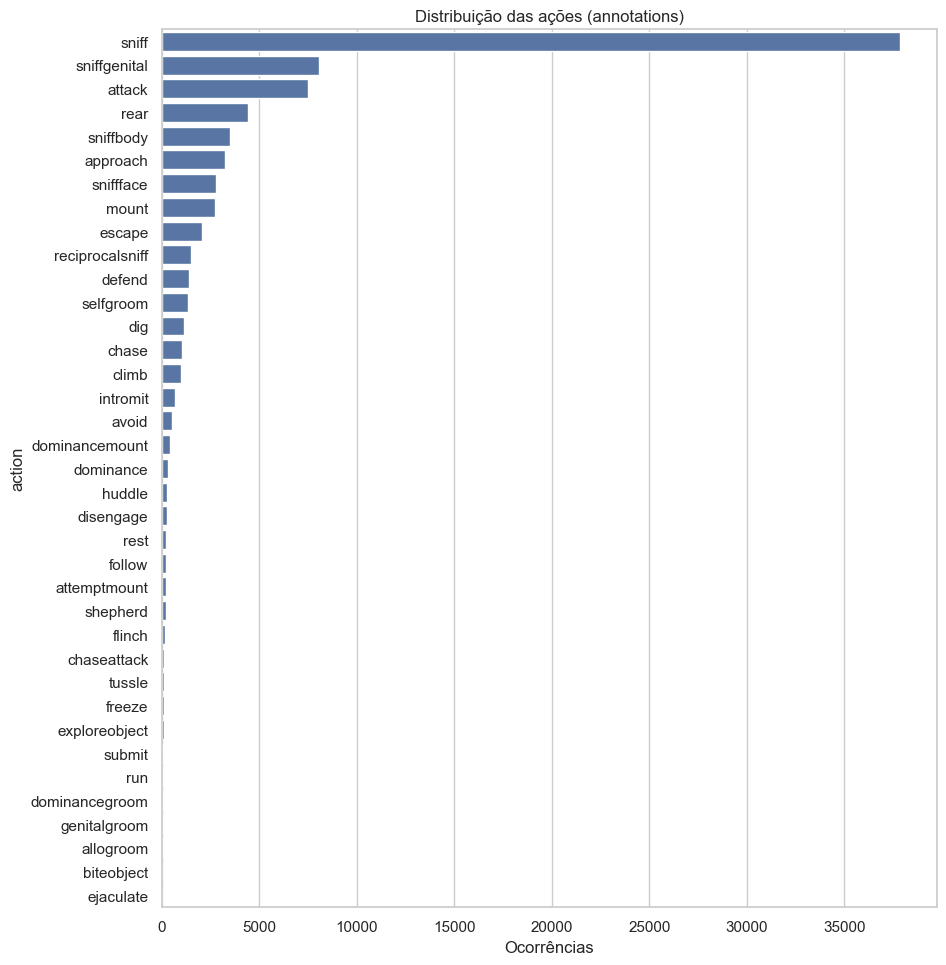

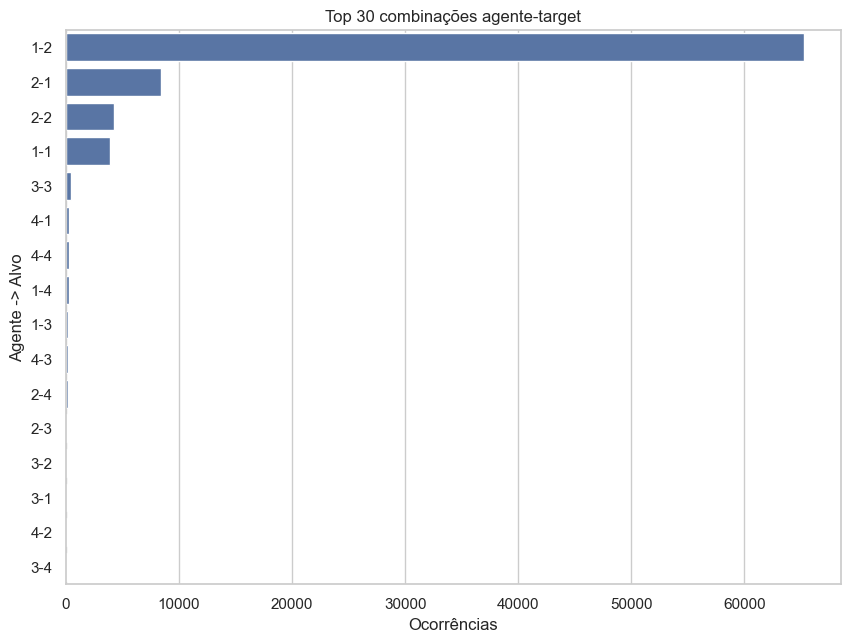

In [ ]:
actions_available = annotations_raw.dropna(subset=['action'])
action_counts = actions_available['action'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 4 + 0.2 * len(action_counts)))
sns.barplot(x=action_counts.values, y=action_counts.index)
plt.title('Distribuição das ações (annotations)')
plt.xlabel('Ocorrências')
plt.ylabel('action')
plt.show()

agent_target_valid = annotations_raw.dropna(subset=['agent_id', 'target_id']).copy()
agent_target_valid[['agent_id', 'target_id']] = agent_target_valid[['agent_id', 'target_id']].astype(int)
agent_target_combo = (
    agent_target_valid['agent_id'].astype(str) + '-' + agent_target_valid['target_id'].astype(str)
)
combo_counts = agent_target_combo.value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 4 + 0.2 * min(30, len(combo_counts))))
sns.barplot(x=combo_counts.head(30).values, y=combo_counts.head(30).index)
plt.title('Top 30 combinações agente-target')
plt.xlabel('Ocorrências')
plt.ylabel('Agente -> Alvo')
plt.show()


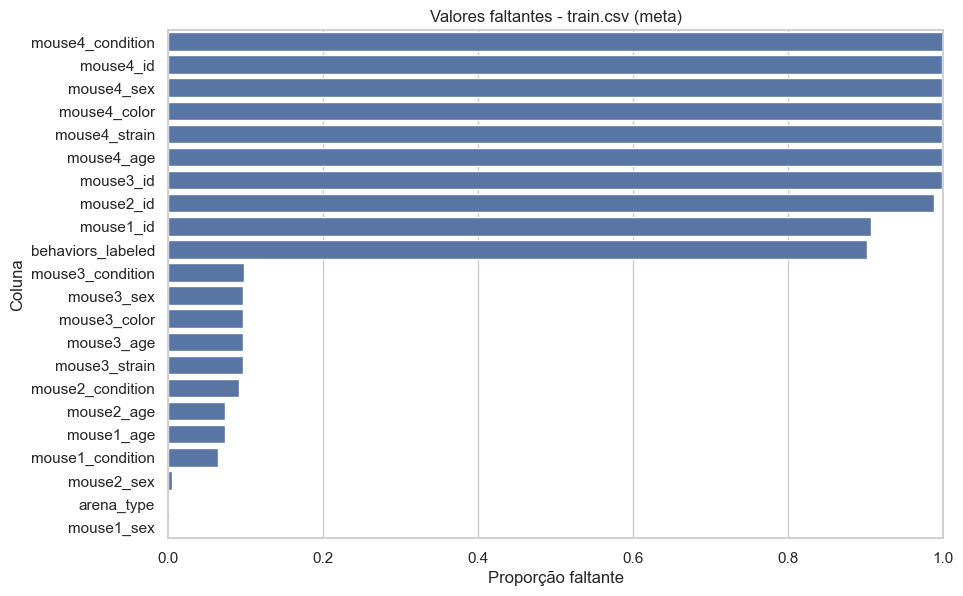

In [147]:
def plot_missing_ratios(df: pd.DataFrame, title: str, top_n: int = 25):
    missing_ratio = df.isna().mean()
    missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)
    if missing_ratio.empty:
        print(f'Sem valores faltantes em {title}.')
        return
    subset = missing_ratio.head(top_n)
    plt.figure(figsize=(10, max(3, len(subset) * 0.3)))
    sns.barplot(x=subset.values, y=subset.index)
    plt.title(f'Valores faltantes - {title}')
    plt.xlabel('Proporção faltante')
    plt.ylabel('Coluna')
    plt.xlim(0, 1)
    plt.show()

plot_missing_ratios(train, 'train.csv (meta)')


In [ ]:
same_action_limit = 1000
annotations_limited = []
for action, group in annotations_processed.groupby('action', observed=False):
    if len(group) > same_action_limit:
        sampled = group.sample(n=same_action_limit, random_state=42)
        annotations_limited.append(sampled)
    else:
        annotations_limited.append(group)

annotations_processed = pd.concat(annotations_limited).reset_index(drop=True)
print(f'Anotações limitadas a {same_action_limit} por ação: {annotations_processed.shape}')

Anotações limitadas a 1000 por ação: (19414, 7)


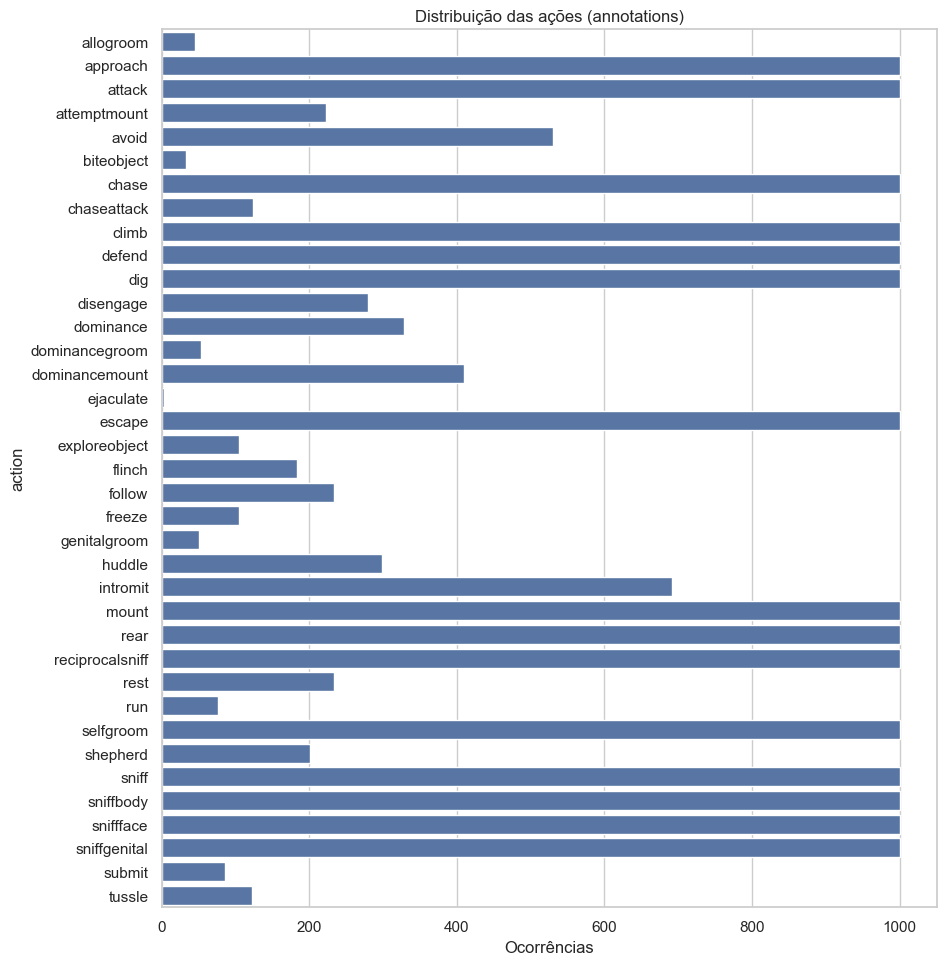

In [ ]:
actions_available = annotations_processed.dropna(subset=['action'])
action_counts = actions_available['action'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 4 + 0.2 * len(action_counts)))
sns.barplot(x=action_counts.values, y=action_counts.index)
plt.title('Distribuição das ações (annotations)')
plt.xlabel('Ocorrências')
plt.ylabel('action')
plt.show()

# Cálculo do Movimento Total por Segmento

Esta etapa gera e integra as **métricas de deslocamento total** associadas a cada evento de anotação.  
Seu objetivo é quantificar o movimento observado em cada segmento de frames e normalizar essas informações para uso no modelo de MLP.

## Cálculo Inicial

As distâncias totais percorridas em cada anotação são obtidas a partir dos dados de tracking.  
Cada linha do conjunto de anotações recebe o somatório dos deslocamentos (`movement_*`) ocorridos entre os frames de início e término (`start_frame_raw` e `stop_frame_raw`).  
Esses valores representam o **movimento absoluto** dentro do intervalo correspondente à ação.

## Extração de Estatísticas

Após o cálculo, são determinadas estatísticas por feature de movimento, incluindo:
- **`fill`**: média utilizada para preencher valores ausentes;  
- **`min` e `max`**: limites observados de cada métrica.

Essas estatísticas são fundamentais para padronizar a escala dos dados e garantir comparabilidade entre vídeos e laboratórios diferentes.

## Escalonamento e Integração das Features

As métricas de movimento são normalizadas para o intervalo **[-1, 1]**, gerando versões escaladas (`segment_total_scaled_*`) e mantendo as originais (`segment_total_raw_*`).  
As novas colunas são adicionadas ao conjunto de anotações processadas, permitindo análises consistentes e comparáveis entre segmentos.

O resultado final é um conjunto que combina:
- Identificadores de vídeo e frames;  
- Métricas de deslocamento bruto e escalado;  
- Estatísticas globais por tipo de movimento.

## Combinação com Dataset Geral

O conjunto enriquecido de anotações é posteriormente unido às **features globais do vídeo** do vídeo correspondente.  
Esse processo garante que cada evento possua tanto as métricas locais de movimento (por segmento) quanto as estatísticas gerais do vídeo.  

---

## Resultado Final

O produto final é um **dataset completo e contextualizado**, no qual cada ação anotada contém:
- Informações temporais precisas;  
- Distâncias percorridas durante o evento;  
- Features normalizadas de movimento;  
- Dados complementares de tracking.

In [ ]:
global TRACKING_MOVEMENT_COLUMNS, SEGMENT_TRACKING_FEATURE_COLUMNS, SEGMENT_MOVEMENT_STATS
segment_movement_totals = compute_segment_movement_totals(annotations_processed, TRACKING_DIR)
TRACKING_MOVEMENT_COLUMNS = sorted(segment_movement_totals.columns.tolist())
SEGMENT_TRACKING_FEATURE_COLUMNS = [f'segment_total_scaled_{col}' for col in TRACKING_MOVEMENT_COLUMNS]
SEGMENT_MOVEMENT_STATS = {}
scaled_segment_frames = {}
for col in TRACKING_MOVEMENT_COLUMNS:
    series = segment_movement_totals[col]
    valid = series.dropna()
    fill = float(valid.mean()) if not valid.empty else 0.0
    min_val = float(valid.min()) if not valid.empty else 0.0
    max_val = float(valid.max()) if not valid.empty else 0.0
    SEGMENT_MOVEMENT_STATS[col] = {'fill': fill, 'min': min_val, 'max': max_val}
    filled = series.fillna(fill)
    scaled_segment_frames[col] = min_max_scale_to_unit_interval(filled, min_val, max_val)
scaled_df = pd.DataFrame(scaled_segment_frames, index=segment_movement_totals.index)[TRACKING_MOVEMENT_COLUMNS]
annotations_processed = annotations_processed.join(segment_movement_totals.add_prefix('segment_total_raw_'))
annotations_processed = annotations_processed.join(scaled_df.add_prefix('segment_total_scaled_'))
preview_cols = ['lab_id', 'video_id', 'start_frame_raw', 'stop_frame_raw']
preview_cols += [f'segment_total_scaled_{col}' for col in TRACKING_MOVEMENT_COLUMNS[:5]]
display(annotations_processed[preview_cols].head())


,lab_id,video_id,start_frame_raw,stop_frame_raw,segment_total_scaled_movement_mouse1,segment_total_scaled_movement_mouse1_body_center,segment_total_scaled_movement_mouse1_ear_left,segment_total_scaled_movement_mouse1_ear_right,segment_total_scaled_movement_mouse1_head
0,ElegantMink,535058450,39645,39852,-0.974919,-0.982241,-0.949440,-0.941416,-0.976453
1,ElegantMink,535058450,40044,40137,-0.981658,-0.982241,-0.960101,-0.964239,-0.976453
2,ElegantMink,535058450,40474,40541,-0.992511,-0.982241,-0.984438,-0.984680,-0.976453
3,ElegantMink,551378303,17285,17359,-0.989337,-0.982241,-0.974997,-0.974261,-0.976453
4,ElegantMink,685480647,4981,5122,-0.989792,-0.982241,-0.969088,-0.966019,-0.976453


In [151]:
annotations_with_features = annotations_processed.merge(
    train_processed,
    on=['lab_id', 'video_id'],
    how='left',
    validate='many_to_one'
)
feature_columns = [c for c in train_processed.columns if c not in ['lab_id', 'video_id']]
missing_feature_rows = annotations_with_features[feature_columns].isna().any(axis=1).sum() if feature_columns else 0
print('Dataset final de eventos + features:', annotations_with_features.shape)
if missing_feature_rows:
    print(f'Aviso: {missing_feature_rows} linhas estão sem alguma feature de tracking após o merge.')
else:
    print('Todas as linhas contam com as features de tracking correspondentes.')
display(annotations_with_features.head())


Dataset final de eventos + features: (19414, 252)
Todas as linhas contam com as features de tracking correspondentes.


,lab_id,video_id,action,start_frame_raw,stop_frame_raw,start_frame,stop_frame,segment_total_raw_movement_overall,segment_total_raw_movement_mouse1,segment_total_raw_movement_mouse1_body_center,segment_total_raw_movement_mouse1_ear_left,segment_total_raw_movement_mouse1_ear_right,segment_total_raw_movement_mouse1_headpiece_bottombackleft,segment_total_raw_movement_mouse1_headpiece_bottombackright,segment_total_raw_movement_mouse1_headpiece_bottomfrontleft,segment_total_raw_movement_mouse1_headpiece_bottomfrontright,segment_total_raw_movement_mouse1_headpiece_topbackleft,segment_total_raw_movement_mouse1_headpiece_topbackright,segment_total_raw_movement_mouse1_headpiece_topfrontleft,segment_total_raw_movement_mouse1_headpiece_topfrontright,segment_total_raw_movement_mouse1_lateral_left,segment_total_raw_movement_mouse1_lateral_right,segment_total_raw_movement_mouse1_neck,segment_total_raw_movement_mouse1_nose,segment_total_raw_movement_mouse1_tail_base,segment_total_raw_movement_mouse1_tail_midpoint,segment_total_raw_movement_mouse1_tail_tip,segment_total_raw_movement_mouse2,segment_total_raw_movement_mouse2_body_center,segment_total_raw_movement_mouse2_ear_left,segment_total_raw_movement_mouse2_ear_right,segment_total_raw_movement_mouse2_headpiece_bottombackleft,segment_total_raw_movement_mouse2_headpiece_bottombackright,segment_total_raw_movement_mouse2_headpiece_bottomfrontleft,segment_total_raw_movement_mouse2_headpiece_bottomfrontright,segment_total_raw_movement_mouse2_headpiece_topbackleft,segment_total_raw_movement_mouse2_headpiece_topbackright,segment_total_raw_movement_mouse2_headpiece_topfrontleft,segment_total_raw_movement_mouse2_headpiece_topfrontright,segment_total_raw_movement_mouse2_lateral_left,segment_total_raw_movement_mouse2_lateral_right,segment_total_raw_movement_mouse2_neck,segment_total_raw_movement_mouse2_nose,segment_total_raw_movement_mouse2_tail_base,segment_total_raw_movement_mouse2_tail_midpoint,segment_total_raw_movement_mouse2_tail_tip,segment_total_raw_movement_mouse3,segment_total_raw_movement_mouse3_body_center,segment_total_raw_movement_mouse3_ear_left,segment_total_raw_movement_mouse3_ear_right,...,mouse1_strain_c57bl_6j,mouse1_strain_c57bl_6j_x_ai148,mouse1_strain_c57bl_6n,mouse1_strain_cd_1__icr,mouse1_strain_cd1,mouse1_strain_cfw,mouse1_color_black,mouse1_color_black_and_tan,mouse1_color_brown,mouse1_color_white,mouse1_sex_female,mouse1_sex_male,mouse2_strain_129_svevtac,mouse2_strain_balb_c,mouse2_strain_btbr,mouse2_strain_c57bl_6j,mouse2_strain_c57bl_6n,mouse2_strain_cd_1__icr,mouse2_strain_cd1,mouse2_strain_cfw,mouse2_color_black,mouse2_color_black_and_tan,mouse2_color_brown,mouse2_color_white,mouse2_sex_female,mouse2_sex_male,mouse3_strain_btbr,mouse3_strain_c57bl_6j,mouse3_strain_cd_1__icr,mouse3_color_black,mouse3_color_black_and_tan,mouse3_color_white,mouse3_sex_male,mouse4_strain_cd_1__icr,mouse4_color_white,mouse4_sex_male,mouse4_condition_wireless_device,arena_shape_circular,arena_shape_rectangular,arena_shape_split_rectangluar,arena_shape_square,arena_type_csds,arena_type_divided_territories,arena_type_familiar,arena_type_neutral,arena_type_resident_intruder,tracking_method_deeplabcut,tracking_method_mars,tracking_method_sleap,tracking_method_custom_hrnet
0,ElegantMink,535058450,allogroom,39645,39852,0.492141,0.496635,17989.650651,7370.210125,NaN,933.979944,1080.127658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052.058897,889.825497,1100.308806,NaN,NaN,10619.440380,NaN,1497.375330,1587.650563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1462.700957,1810.613754,1486.437784,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ElegantMink,535058450,allogroom,40044,40137,0.507958,0.507917,11411.508750,5389.880918,NaN,737.050532,659.327455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,693.275211,694.950474,955.956143,NaN,Na

# Preparação do Conjunto de Treino e MLP

## 1) Preparação do Conjunto de Treino

Cria o conjunto de dados usado para treinar o classificador MLP.

**Etapas:**
- Converte a coluna `action` em códigos numéricos (`action_id`).
- Seleciona apenas colunas numéricas úteis:
  - **Segmento:** `segment_total_scaled_*`
  - **Metadados:** variáveis numéricas, exceto chaves e colunas brutas.
- Remove colunas duplicadas e valores faltantes.
- Transforma os dados em matrizes `X` (features) e `y` (rótulos).
- Divide o dataset em **treino**, **validação** e **teste** com proporções fixas e reprodutibilidade.

---

## 2) Treinamento e Avaliação do MLP

Treina um modelo **Multilayer Perceptron (MLP)** para classificar ações com base nas features preparadas.

**Configuração:**
- Camadas ocultas: 128 → 64 → 32.
- lr=0.02,
- max_epochs=3000,
- batch_size=1024,
- random_state=42,
- l2=1e-4,

**Justificativa de Parâmetros**
- Parâmetros foram testados em função da maximização de seus resultados mantendo performance e velocidade de treino para facilitar o desenvolvimento e publicação do notebook no kaggle, o mesmo vale pela escolha da predição em mini-batches.

**Avaliação:**
- Mede **acurácia**, **precisão**, **recall** e **F1-score** por classe.
- Gera **matriz de confusão** para analisar erros.
- Exibe curvas de **loss** e **accuracy** por época.


In [ ]:
global METADATA_FEATURE_COLUMNS, SEGMENT_TRACKING_FEATURE_COLUMNS
annotations_model_df = annotations_with_features.copy()
annotations_model_df['action_id'] = annotations_model_df['action'].cat.codes
segment_feature_columns = SEGMENT_TRACKING_FEATURE_COLUMNS if SEGMENT_TRACKING_FEATURE_COLUMNS else [c for c in annotations_model_df.columns if c.startswith('segment_total_scaled_')]
base_excluded = set(['action', 'action_id', 'lab_id', 'video_id', 'start_frame_raw', 'stop_frame_raw'])
metadata_feature_columns = [
    c for c in annotations_model_df.columns
    if c not in base_excluded
    and c not in segment_feature_columns
    and annotations_model_df[c].dtype.kind in 'fc'
    and not c.startswith('segment_total_raw_')
]
METADATA_FEATURE_COLUMNS = metadata_feature_columns
SEGMENT_TRACKING_FEATURE_COLUMNS = segment_feature_columns
feature_columns_ordered = ['start_frame', 'stop_frame'] + metadata_feature_columns + segment_feature_columns
seen = set()
mlp_feature_columns = [x for x in feature_columns_ordered if not (x in seen or seen.add(x))]
annotations_model_df = annotations_model_df.drop(columns=['lab_id', 'video_id', 'start_frame_raw', 'stop_frame_raw'], errors='ignore')
missing_cols = [col for col in mlp_feature_columns if col not in annotations_model_df.columns]
if missing_cols:
    raise KeyError(f'Colunas esperadas ausentes no dataset de treino: {missing_cols}')
if annotations_model_df[mlp_feature_columns].isna().any().any():
    raise ValueError('Existem valores faltantes nas features utilizadas pelo MLP.')
X_full = annotations_model_df[mlp_feature_columns].to_numpy(dtype=np.float64)
y_full = annotations_model_df['action_id'].to_numpy(dtype=int)
action_categories = annotations_model_df['action'].cat.categories
action_id_to_label = {idx: label for idx, label in enumerate(action_categories)}
num_classes = len(action_categories)
print('Dimensão do dataset para treinamento:', X_full.shape, '->', num_classes, 'classes')
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(
    X_full, y_full, test_size=0.15, val_size=0.15, random_state=42
)
print('Split -> treino:', X_train.shape[0], 'val:', X_val.shape[0], 'teste:', X_test.shape[0])
display(annotations_model_df[mlp_feature_columns].head())


Dimensão do dataset para treinamento: (19414, 156) -> 37 classes
Split -> treino: 13590 val: 2912 teste: 2912


,start_frame,stop_frame,mouse1_age,mouse2_age,mouse3_age,mouse4_age,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,mouse1_strain_129_svevtac,mouse1_strain_btbr,mouse1_strain_c57bl_6j,mouse1_strain_c57bl_6j_x_ai148,mouse1_strain_c57bl_6n,mouse1_strain_cd_1__icr,mouse1_strain_cd1,mouse1_strain_cfw,mouse1_color_black,mouse1_color_black_and_tan,mouse1_color_brown,mouse1_color_white,mouse1_sex_female,mouse1_sex_male,mouse2_strain_129_svevtac,mouse2_strain_balb_c,mouse2_strain_btbr,mouse2_strain_c57bl_6j,mouse2_strain_c57bl_6n,mouse2_strain_cd_1__icr,mouse2_strain_cd1,mouse2_strain_cfw,mouse2_color_black,mouse2_color_black_and_tan,mouse2_color_brown,mouse2_color_white,mouse2_sex_female,mouse2_sex_male,mouse3_strain_btbr,mouse3_strain_c57bl_6j,mouse3_strain_cd_1__icr,mouse3_color_black,mouse3_color_black_and_tan,mouse3_color_white,mouse3_sex_male,mouse4_strain_cd_1__icr,mouse4_color_white,...,segment_total_scaled_movement_mouse2_lateral_left,segment_total_scaled_movement_mouse2_lateral_right,segment_total_scaled_movement_mouse2_neck,segment_total_scaled_movement_mouse2_nose,segment_total_scaled_movement_mouse2_spine_1,segment_total_scaled_movement_mouse2_spine_2,segment_total_scaled_movement_mouse2_tail_base,segment_total_scaled_movement_mouse2_tail_middle_1,segment_total_scaled_movement_mouse2_tail_middle_2,segment_total_scaled_movement_mouse2_tail_midpoint,segment_total_scaled_movement_mouse2_tail_tip,segment_total_scaled_movement_mouse3,segment_total_scaled_movement_mouse3_body_center,segment_total_scaled_movement_mouse3_ear_left,segment_total_scaled_movement_mouse3_ear_right,segment_total_scaled_movement_mouse3_headpiece_bottombackleft,segment_total_scaled_movement_mouse3_headpiece_bottombackright,segment_total_scaled_movement_mouse3_headpiece_bottomfrontleft,segment_total_scaled_movement_mouse3_headpiece_bottomfrontright,segment_total_scaled_movement_mouse3_headpiece_topbackleft,segment_total_scaled_movement_mouse3_headpiece_topbackright,segment_total_scaled_movement_mouse3_headpiece_topfrontleft,segment_total_scaled_movement_mouse3_headpiece_topfrontright,segment_total_scaled_movement_mouse3_lateral_left,segment_total_scaled_movement_mouse3_lateral_right,segment_total_scaled_movement_mouse3_neck,segment_total_scaled_movement_mouse3_nose,segment_total_scaled_movement_mouse3_tail_base,segment_total_scaled_movement_mouse3_tail_midpoint,segment_total_scaled_movement_mouse3_tail_tip,segment_total_scaled_movement_mouse4,segment_total_scaled_movement_mouse4_body_center,segment_total_scaled_movement_mouse4_ear_left,segment_total_scaled_movement_mouse4_ear_right,segment_total_scaled_movement_mouse4_headpiece_bottombackleft,segment_total_scaled_movement_mouse4_headpiece_bottombackright,segment_total_scaled_movement_mouse4_headpiece_bottomfrontleft,segment_total_scaled_movement_mouse4_headpiece_bottomfrontright,segment_total_scaled_movement_mouse4_headpiece_topbackleft,segment_total_scaled_movement_mouse4_headpiece_topbackright,segment_total_scaled_movement_mouse4_headpiece_topfrontleft,segment_total_scaled_movement_mouse4_headpiece_topfrontright,segment_total_scaled_movement_mouse4_lateral_left,segment_total_scaled_movement_mouse4_lateral_right,segment_total_scaled_movement_mouse4_neck,segment_total_scaled_movement_mouse4_nose,segment_total_scaled_movement_mouse4_tail_base,segment_total_scaled_movement_mouse4_tail_midpoint,segment_total_scaled_movement_mouse4_tail_tip,segment_total_scaled_movement_overall
0,0.492141,0.496635,-0.553824,-0.278499,0.99572,0.0,-0.63643,-0.819250,-0.573109,-0.519451,-0.692803,-0.621622,-0.814815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,-0.980949,-0.980968,-0.937309,-0.968846,-0.933752,-0.93327,-0.964322,-0.930019,-0.946102,-0.940143,-0.986003,-0.87719,-0.822183,-0.896376,-0.869865,-0.833133,-0.739612,-0.777605,-0.754131,-0.735291

In [ ]:
hidden_layers = [128, 64, 32]
mlp_action_model = train_mlp_classifier(
    X_train, y_train,
    hidden_layers=hidden_layers,
    output_dim=num_classes,
    lr=0.02,
    max_epochs=3000,
    batch_size=1024,
    random_state=42,
    l2=1e-4,
    track_history=True,
)
y_train_pred = mlp_action_model.predict(X_train)
y_test_pred = mlp_action_model.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Acurácia -> treino: {train_acc:.3f} | teste: {test_acc:.3f}')
metrics_by_class = precision_recall_f1(y_test, y_test_pred, labels=np.arange(num_classes))
metrics_df = (
    pd.DataFrame(metrics_by_class).T
    .rename_axis('action_id')
    .reset_index()
)
metrics_df['action'] = metrics_df['action_id'].map(lambda idx: action_categories[idx])
display(metrics_df[['action', 'precision', 'recall', 'f1']])
cm = confusion_matrix_true(y_test, y_test_pred, labels=np.arange(num_classes))
cm.index = [action_categories[idx] for idx in cm.index]
cm.columns = [action_categories[idx] for idx in cm.columns]
display(cm)


Acurácia -> treino: 0.429 | teste: 0.431


,action,precision,recall,f1
0,allogroom,0.000000,0.000000,0.000000
1,approach,0.600000,0.019481,0.037736
2,attack,0.545946,0.631250,0.585507
3,attemptmount,0.451613,0.411765,0.430769
4,avoid,0.382353,0.173333,0.238532
5,biteobject,0.000000,0.000000,0.000000
6,chase,0.476636,0.713287,0.571429
7,chaseattack,0.000000,0.000000,0.000000
8,climb,0.232114,0.895706,0.368687
9,defend,0.588608,0.577640,0.583072


,allogroom,approach,attack,attemptmount,avoid,biteobject,chase,chaseattack,climb,defend,dig,disengage,dominance,dominancegroom,dominancemount,ejaculate,escape,exploreobject,flinch,follow,freeze,genitalgroom,huddle,intromit,mount,rear,reciprocalsniff,rest,run,selfgroom,shepherd,sniff,sniffbody,sniffface,sniffgenital,submit,tussle
allogroom,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0
approach,0,3,2,0,0,0,0,0,40,2,24,17,0,0,3,0,0,0,0,0,0,0,0,0,7,25,0,0,0,9,0,0,21,0,1,0,0
attack,0,0,101,0,0,0,31,2,7,1,2,2,4,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,1,0,0,0,0
attemptmount,0,0,0,14,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,12,0,0,0,0
avoid,0,1,0,0,13,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0
biteobject,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chase,0,0,0,0,7,0,102,0,18,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0,0,6,0,0,0,0,0
chaseattack,0,0,0,0,5,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
climb,0,0,0,0,0,0,3,0,146,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0
defend,0,0,2,0,0,0,0,0,59,93,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [154]:
y_val_pred = mlp_action_model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f'Acurácia no conjunto de validação: {val_acc:.3f}')
val_metrics_by_class = precision_recall_f1(y_val, y_val_pred, labels=np.arange(num_classes))
val_metrics_df = (
    pd.DataFrame(val_metrics_by_class).T
    .rename_axis('action_id')
    .reset_index()
)
val_metrics_df['action'] = val_metrics_df['action_id'].map(lambda idx: action_categories[idx])
display(val_metrics_df[['action', 'precision', 'recall', 'f1']])

Acurácia no conjunto de validação: 0.421


,action,precision,recall,f1
0,allogroom,0.000000,0.000000,0.000000
1,approach,0.250000,0.007042,0.013699
2,attack,0.519774,0.575000,0.545994
3,attemptmount,0.526316,0.333333,0.408163
4,avoid,0.583333,0.333333,0.424242
5,biteobject,0.000000,0.000000,0.000000
6,chase,0.560976,0.684524,0.616622
7,chaseattack,1.000000,0.100000,0.181818
8,climb,0.184862,0.920290,0.307879
9,defend,0.543750,0.564935,0.554140


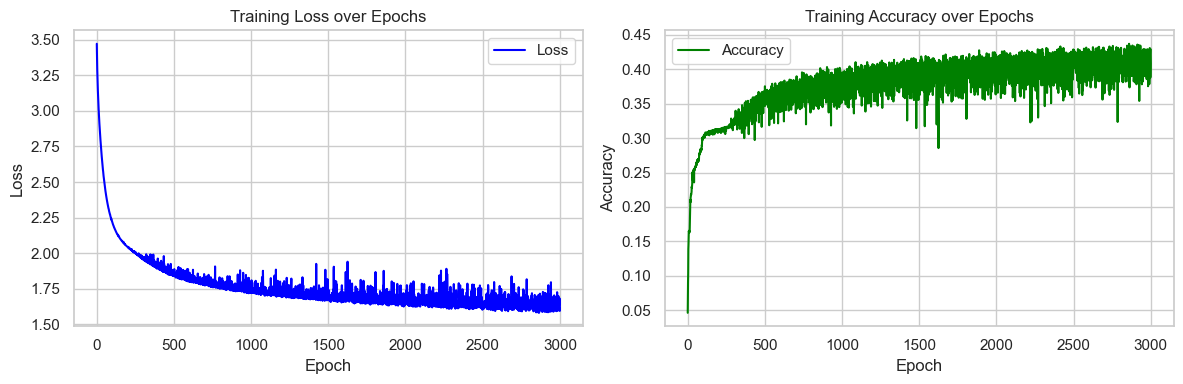

In [155]:
accuracy = mlp_action_model.acc_history_
loss = mlp_action_model.loss_history_

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(1, len(loss) + 1), loss, label='Loss', color='blue')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss over Epochs')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(range(1, len(accuracy) + 1), accuracy, label='Accuracy', color='green')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy over Epochs')
ax[1].grid(True)
ax[1].legend()
plt.tight_layout()
plt.show()

## Processamento de Anotações com `agent_and_target`

### 1) Enriquecimento das Anotações

Adiciona às anotações as colunas de **agente**, **alvo** e uma identificação combinada (`agent_and_target`).

**Etapas:**
- Recupera `agent_id` e `target_id` do conjunto bruto e alinha pelos frames originais.
- Converte para inteiros e trata ausentes como “missing”.
- Cria uma coluna categórica `agent_and_target` unindo os dois IDs.
- Reorganiza as colunas para destacar identificadores e frames.

**Resultado:**  
Anotações com `agent_id`, `target_id` e `agent_and_target` consolidados para cada ação.

---

### 2) Integração com Features de Tracking

Combina as anotações com **features de tracking por vídeo** e adiciona **one-hot encoding** da ação.

**Etapas:**
- Faz merge com as features agregadas por vídeo.
- Gera colunas `action_*` (uma por tipo de ação).
- Garante que todas as anotações possuam as features correspondentes.

**Resultado:**  
Dataset completo com frames, tracking, ação codificada e par agente–alvo.

---

### 3) Preparação para o MLP de `agent_and_target`

Prepara o dataset para o modelo que prevê o par **agente–alvo**.

**Etapas:**
- Seleciona colunas numéricas relevantes (metadados e movimento escalado).
- Define `agent_target_id` como rótulo numérico de `agent_and_target`.
- Remove colunas irrelevantes e valida ausência de valores faltantes.
- Divide em **treino**, **validação** e **teste** com reprodutibilidade garantida.

**Resultado:**  
Matriz de features e rótulos pronta para treinar o MLP de predição do par agente–alvo.

In [ ]:
agent_target_cols = annotations_raw[['lab_id', 'video_id', 'agent_id', 'target_id', 'start_frame', 'stop_frame']].rename(
    columns={'start_frame': 'start_frame_raw', 'stop_frame': 'stop_frame_raw'}
)
annotations_pairs_processed = annotations_processed.merge(
    agent_target_cols,
    on=['lab_id', 'video_id', 'start_frame_raw', 'stop_frame_raw'],
    how='left'
)
annotations_pairs_processed['agent_id'] = annotations_pairs_processed['agent_id'].astype('Int64')
annotations_pairs_processed['target_id'] = annotations_pairs_processed['target_id'].astype('Int64')
missing_mask = annotations_pairs_processed['agent_id'].isna() | annotations_pairs_processed['target_id'].isna()
agent_str = annotations_pairs_processed['agent_id'].fillna(-1).astype(int).astype(str)
target_str = annotations_pairs_processed['target_id'].fillna(-1).astype(int).astype(str)
annotations_pairs_processed['agent_and_target'] = agent_str + target_str
annotations_pairs_processed.loc[missing_mask, 'agent_and_target'] = 'missing'
annotations_pairs_processed['agent_and_target'] = annotations_pairs_processed['agent_and_target'].astype('category')
ordered_cols_pairs = [
    'lab_id',
    'video_id',
    'agent_id',
    'target_id',
    'agent_and_target',
    'action',
    'start_frame_raw',
    'stop_frame_raw',
    'start_frame',
    'stop_frame'
]
remaining_pairs = [c for c in annotations_pairs_processed.columns if c not in ordered_cols_pairs]
annotations_pairs_processed = annotations_pairs_processed[ordered_cols_pairs + remaining_pairs]
print('Anotações com agent_and_target:', annotations_pairs_processed.shape)
display(annotations_pairs_processed.head())


Anotações com agent_and_target: (20778, 192)


,lab_id,video_id,agent_id,target_id,agent_and_target,action,start_frame_raw,stop_frame_raw,start_frame,stop_frame,segment_total_raw_movement_overall,segment_total_raw_movement_mouse1,segment_total_raw_movement_mouse1_body_center,segment_total_raw_movement_mouse1_ear_left,segment_total_raw_movement_mouse1_ear_right,segment_total_raw_movement_mouse1_headpiece_bottombackleft,segment_total_raw_movement_mouse1_headpiece_bottombackright,segment_total_raw_movement_mouse1_headpiece_bottomfrontleft,segment_total_raw_movement_mouse1_headpiece_bottomfrontright,segment_total_raw_movement_mouse1_headpiece_topbackleft,segment_total_raw_movement_mouse1_headpiece_topbackright,segment_total_raw_movement_mouse1_headpiece_topfrontleft,segment_total_raw_movement_mouse1_headpiece_topfrontright,segment_total_raw_movement_mouse1_lateral_left,segment_total_raw_movement_mouse1_lateral_right,segment_total_raw_movement_mouse1_neck,segment_total_raw_movement_mouse1_nose,segment_total_raw_movement_mouse1_tail_base,segment_total_raw_movement_mouse1_tail_midpoint,segment_total_raw_movement_mouse1_tail_tip,segment_total_raw_movement_mouse2,segment_total_raw_movement_mouse2_body_center,segment_total_raw_movement_mouse2_ear_left,segment_total_raw_movement_mouse2_ear_right,segment_total_raw_movement_mouse2_headpiece_bottombackleft,segment_total_raw_movement_mouse2_headpiece_bottombackright,segment_total_raw_movement_mouse2_headpiece_bottomfrontleft,segment_total_raw_movement_mouse2_headpiece_bottomfrontright,segment_total_raw_movement_mouse2_headpiece_topbackleft,segment_total_raw_movement_mouse2_headpiece_topbackright,segment_total_raw_movement_mouse2_headpiece_topfrontleft,segment_total_raw_movement_mouse2_headpiece_topfrontright,segment_total_raw_movement_mouse2_lateral_left,segment_total_raw_movement_mouse2_lateral_right,segment_total_raw_movement_mouse2_neck,segment_total_raw_movement_mouse2_nose,segment_total_raw_movement_mouse2_tail_base,segment_total_raw_movement_mouse2_tail_midpoint,segment_total_raw_movement_mouse2_tail_tip,segment_total_raw_movement_mouse3,...,segment_total_scaled_movement_mouse2_lateral_left,segment_total_scaled_movement_mouse2_lateral_right,segment_total_scaled_movement_mouse2_neck,segment_total_scaled_movement_mouse2_nose,segment_total_scaled_movement_mouse2_spine_1,segment_total_scaled_movement_mouse2_spine_2,segment_total_scaled_movement_mouse2_tail_base,segment_total_scaled_movement_mouse2_tail_middle_1,segment_total_scaled_movement_mouse2_tail_middle_2,segment_total_scaled_movement_mouse2_tail_midpoint,segment_total_scaled_movement_mouse2_tail_tip,segment_total_scaled_movement_mouse3,segment_total_scaled_movement_mouse3_body_center,segment_total_scaled_movement_mouse3_ear_left,segment_total_scaled_movement_mouse3_ear_right,segment_total_scaled_movement_mouse3_headpiece_bottombackleft,segment_total_scaled_movement_mouse3_headpiece_bottombackright,segment_total_scaled_movement_mouse3_headpiece_bottomfrontleft,segment_total_scaled_movement_mouse3_headpiece_bottomfrontright,segment_total_scaled_movement_mouse3_headpiece_topbackleft,segment_total_scaled_movement_mouse3_headpiece_topbackright,segment_total_scaled_movement_mouse3_headpiece_topfrontleft,segment_total_scaled_movement_mouse3_headpiece_topfrontright,segment_total_scaled_movement_mouse3_lateral_left,segment_total_scaled_movement_mouse3_lateral_right,segment_total_scaled_movement_mouse3_neck,segment_total_scaled_movement_mouse3_nose,segment_total_scaled_movement_mouse3_tail_base,segment_total_scaled_movement_mouse3_tail_midpoint,segment_total_scaled_movement_mouse3_tail_tip,segment_total_scaled_movement_mouse4,segment_total_scaled_movement_mouse4_body_center,segment_total_scaled_movement_mouse4_ear_left,segment_total_scaled_movement_mouse4_ear_right,segment_total_scaled_movement_mouse4_headpiece_bottombackleft,segment_total_scaled_movement_mouse4_headpiece_bottombackright,segment_total_scaled_movement_mouse4_headpiece_bottomfrontleft,segment_total_scaled_movement_mouse4_he

In [ ]:
annotations_pairs_with_features = annotations_pairs_processed.merge(
    train_processed,
    on=['lab_id', 'video_id'],
    how='left',
    validate='many_to_one'
)
feature_columns_pairs = [c for c in train_processed.columns if c not in ['lab_id', 'video_id']]
missing_pairs = annotations_pairs_with_features[feature_columns_pairs].isna().any(axis=1).sum() if feature_columns_pairs else 0
if missing_pairs:
    print(f'Aviso: {missing_pairs} linhas estão sem alguma feature de tracking.')
else:
    print('Todas as linhas possuem features de tracking após o merge.')
action_one_hot = pd.get_dummies(annotations_pairs_with_features['action'], prefix='action')
action_feature_columns = action_one_hot.columns.tolist()
annotations_pairs_with_features = pd.concat([annotations_pairs_with_features, action_one_hot], axis=1)
print('Shape do dataset com one-hot de action:', annotations_pairs_with_features.shape)
display(annotations_pairs_with_features.head())


Todas as linhas possuem features de tracking após o merge.
Shape do dataset com one-hot de action: (20778, 292)


,lab_id,video_id,agent_id,target_id,agent_and_target,action,start_frame_raw,stop_frame_raw,start_frame,stop_frame,segment_total_raw_movement_overall,segment_total_raw_movement_mouse1,segment_total_raw_movement_mouse1_body_center,segment_total_raw_movement_mouse1_ear_left,segment_total_raw_movement_mouse1_ear_right,segment_total_raw_movement_mouse1_headpiece_bottombackleft,segment_total_raw_movement_mouse1_headpiece_bottombackright,segment_total_raw_movement_mouse1_headpiece_bottomfrontleft,segment_total_raw_movement_mouse1_headpiece_bottomfrontright,segment_total_raw_movement_mouse1_headpiece_topbackleft,segment_total_raw_movement_mouse1_headpiece_topbackright,segment_total_raw_movement_mouse1_headpiece_topfrontleft,segment_total_raw_movement_mouse1_headpiece_topfrontright,segment_total_raw_movement_mouse1_lateral_left,segment_total_raw_movement_mouse1_lateral_right,segment_total_raw_movement_mouse1_neck,segment_total_raw_movement_mouse1_nose,segment_total_raw_movement_mouse1_tail_base,segment_total_raw_movement_mouse1_tail_midpoint,segment_total_raw_movement_mouse1_tail_tip,segment_total_raw_movement_mouse2,segment_total_raw_movement_mouse2_body_center,segment_total_raw_movement_mouse2_ear_left,segment_total_raw_movement_mouse2_ear_right,segment_total_raw_movement_mouse2_headpiece_bottombackleft,segment_total_raw_movement_mouse2_headpiece_bottombackright,segment_total_raw_movement_mouse2_headpiece_bottomfrontleft,segment_total_raw_movement_mouse2_headpiece_bottomfrontright,segment_total_raw_movement_mouse2_headpiece_topbackleft,segment_total_raw_movement_mouse2_headpiece_topbackright,segment_total_raw_movement_mouse2_headpiece_topfrontleft,segment_total_raw_movement_mouse2_headpiece_topfrontright,segment_total_raw_movement_mouse2_lateral_left,segment_total_raw_movement_mouse2_lateral_right,segment_total_raw_movement_mouse2_neck,segment_total_raw_movement_mouse2_nose,segment_total_raw_movement_mouse2_tail_base,segment_total_raw_movement_mouse2_tail_midpoint,segment_total_raw_movement_mouse2_tail_tip,segment_total_raw_movement_mouse3,...,arena_shape_circular,arena_shape_rectangular,arena_shape_split_rectangluar,arena_shape_square,arena_type_csds,arena_type_divided_territories,arena_type_familiar,arena_type_neutral,arena_type_resident_intruder,tracking_method_deeplabcut,tracking_method_mars,tracking_method_sleap,tracking_method_custom_hrnet,action_allogroom,action_approach,action_attack,action_attemptmount,action_avoid,action_biteobject,action_chase,action_chaseattack,action_climb,action_defend,action_dig,action_disengage,action_dominance,action_dominancegroom,action_dominancemount,action_ejaculate,action_escape,action_exploreobject,action_flinch,action_follow,action_freeze,action_genitalgroom,action_huddle,action_intromit,action_mount,action_rear,action_reciprocalsniff,action_rest,action_run,action_selfgroom,action_shepherd,action_sniff,action_sniffbody,action_sniffface,action_sniffgenital,action_submit,action_tussle
0,ElegantMink,535058450,1,2,12,allogroom,39645,39852,0.492141,0.496635,17989.650651,7370.210125,NaN,933.979944,1080.127658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052.058897,889.825497,1100.308806,NaN,NaN,10619.440380,NaN,1497.375330,1587.650563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1462.700957,1810.613754,1486.437784,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,ElegantMink,535058450,1,2,12,allogroom,40044,40137,0.507958,0.507917,11411.508750,5389.880918,NaN,737.050532,659.327455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,693.275211,694.950474,955.956143,NaN,NaN,6021.627804,NaN,965.482169,860.706306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,897.032907,976.991296,772.056954,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,True,False,False,False,False,False,F

In [ ]:
annotations_agent_target_model_df = annotations_pairs_with_features.copy()
annotations_agent_target_model_df['agent_and_target'] = annotations_agent_target_model_df['agent_and_target'].astype('category')
annotations_agent_target_model_df['agent_target_id'] = annotations_agent_target_model_df['agent_and_target'].cat.codes
segment_feature_columns = SEGMENT_TRACKING_FEATURE_COLUMNS if SEGMENT_TRACKING_FEATURE_COLUMNS else [c for c in annotations_agent_target_model_df.columns if c.startswith('segment_total_scaled_')]
metadata_feature_columns = METADATA_FEATURE_COLUMNS if METADATA_FEATURE_COLUMNS else [
    c for c in annotations_agent_target_model_df.columns
    if c not in ['agent_and_target', 'agent_target_id', 'action', 'lab_id', 'video_id', 'start_frame_raw', 'stop_frame_raw']
    and not c.startswith('segment_total_scaled_')
    and not c.startswith('segment_total_raw_')
    and not c.startswith('action_')
    and annotations_agent_target_model_df[c].dtype.kind in 'fc'
]
action_feature_columns = [c for c in annotations_agent_target_model_df.columns if c.startswith('action_')]
feature_columns_ordered = ['start_frame', 'stop_frame'] + metadata_feature_columns + segment_feature_columns + action_feature_columns
seen = set()
mlp_pair_feature_columns = [x for x in feature_columns_ordered if x not in ['agent_id', 'target_id'] and not (x in seen or seen.add(x))]
annotations_agent_target_model_df = annotations_agent_target_model_df.drop(columns=['lab_id', 'video_id', 'start_frame_raw', 'stop_frame_raw'], errors='ignore')
missing_cols = [col for col in mlp_pair_feature_columns if col not in annotations_agent_target_model_df.columns]
if missing_cols:
    raise KeyError(f'Colunas esperadas ausentes para o modelo agent_and_target: {missing_cols}')
if annotations_agent_target_model_df[mlp_pair_feature_columns].isna().any().any():
    raise ValueError('Existem valores faltantes nas features para o modelo agent_and_target.')
X_pairs = annotations_agent_target_model_df[mlp_pair_feature_columns].to_numpy(dtype=np.float64)
y_pairs = annotations_agent_target_model_df['agent_target_id'].to_numpy(dtype=int)
agent_target_categories = annotations_agent_target_model_df['agent_and_target'].cat.categories
agent_target_id_to_label = {idx: label for idx, label in enumerate(agent_target_categories)}
num_agent_target_classes = len(agent_target_categories)
print('Dataset para agent_and_target:', X_pairs.shape, '->', num_agent_target_classes, 'classes')
X_pairs_train, X_pairs_val, X_pairs_test, y_pairs_train, y_pairs_val, y_pairs_test = train_test_split(
    X_pairs, y_pairs, test_size=0.15, val_size=0.15, random_state=42
)
print('Split -> treino:', X_pairs_train.shape[0], 'val:', X_pairs_val.shape[0], 'teste:', X_pairs_test.shape[0])
display(annotations_agent_target_model_df[mlp_pair_feature_columns].head())


Dataset para agent_and_target: (20778, 193) -> 16 classes
Split -> treino: 14544 val: 3117 teste: 3117


,start_frame,stop_frame,mouse1_age,mouse2_age,mouse3_age,mouse4_age,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,mouse1_strain_129_svevtac,mouse1_strain_btbr,mouse1_strain_c57bl_6j,mouse1_strain_c57bl_6j_x_ai148,mouse1_strain_c57bl_6n,mouse1_strain_cd_1__icr,mouse1_strain_cd1,mouse1_strain_cfw,mouse1_color_black,mouse1_color_black_and_tan,mouse1_color_brown,mouse1_color_white,mouse1_sex_female,mouse1_sex_male,mouse2_strain_129_svevtac,mouse2_strain_balb_c,mouse2_strain_btbr,mouse2_strain_c57bl_6j,mouse2_strain_c57bl_6n,mouse2_strain_cd_1__icr,mouse2_strain_cd1,mouse2_strain_cfw,mouse2_color_black,mouse2_color_black_and_tan,mouse2_color_brown,mouse2_color_white,mouse2_sex_female,mouse2_sex_male,mouse3_strain_btbr,mouse3_strain_c57bl_6j,mouse3_strain_cd_1__icr,mouse3_color_black,mouse3_color_black_and_tan,mouse3_color_white,mouse3_sex_male,mouse4_strain_cd_1__icr,mouse4_color_white,...,segment_total_scaled_movement_mouse4_headpiece_bottomfrontright,segment_total_scaled_movement_mouse4_headpiece_topbackleft,segment_total_scaled_movement_mouse4_headpiece_topbackright,segment_total_scaled_movement_mouse4_headpiece_topfrontleft,segment_total_scaled_movement_mouse4_headpiece_topfrontright,segment_total_scaled_movement_mouse4_lateral_left,segment_total_scaled_movement_mouse4_lateral_right,segment_total_scaled_movement_mouse4_neck,segment_total_scaled_movement_mouse4_nose,segment_total_scaled_movement_mouse4_tail_base,segment_total_scaled_movement_mouse4_tail_midpoint,segment_total_scaled_movement_mouse4_tail_tip,segment_total_scaled_movement_overall,action_allogroom,action_approach,action_attack,action_attemptmount,action_avoid,action_biteobject,action_chase,action_chaseattack,action_climb,action_defend,action_dig,action_disengage,action_dominance,action_dominancegroom,action_dominancemount,action_ejaculate,action_escape,action_exploreobject,action_flinch,action_follow,action_freeze,action_genitalgroom,action_huddle,action_intromit,action_mount,action_rear,action_reciprocalsniff,action_rest,action_run,action_selfgroom,action_shepherd,action_sniff,action_sniffbody,action_sniffface,action_sniffgenital,action_submit,action_tussle
0,0.492141,0.496635,-0.553824,-0.278499,0.99572,0.0,-0.63643,-0.819250,-0.573109,-0.519451,-0.692803,-0.621622,-0.814815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,-0.855984,-0.873709,-0.890065,-0.869137,-0.903273,-0.973761,-0.929656,-0.929868,-0.959457,-0.887129,-0.920277,-0.93454,-0.970109,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.507958,0.507917,-0.553824,-0.278499,0.99572,0.0,-0.63643,-0.819250,-0.573109,-0.519451,-0.692803,-0.621622,-0.814815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,-0.855984,-0.873709,-0.890065,-0.869137,-0.903273,-0.973761,-0.929656,-0.929868,-0.959457,-0.887129,-0.920277,-0.93454,-0.981039,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.525004,0.523909,-0.553824,-0.278499,0.99572,0.0,-0.63643,-0.819250,-0.573109,-0.519451,-0.692803,-0.621622,-0.814815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,-0.855984,-0.873709,-0.890065,-0.869137,-0.903273,-0.973761,-0.929656,-0.929868,-0.959457,-0.887129,-0.920277,-0.93454,-0.991241,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

## Treinamento e Avaliação do MLP

Treina um modelo **Multilayer Perceptron (MLP)** para classificar agent-target com base nas features preparadas.

**Configuração:**
- Camadas ocultas: 128 → 64 → 32.
- lr=0.02,
- max_epochs=3000,
- batch_size=1024,
- random_state=42,
- l2=1e-4,

**Justificativa de Parâmetros**
- Parâmetros foram testados em função da maximização de seus resultados mantendo performance e velocidade de treino para facilitar o desenvolvimento e publicação do notebook no kaggle, o mesmo vale pela escolha da predição em mini-batches.

**Avaliação:**
- Mede **acurácia**, **precisão**, **recall** e **F1-score** por classe.
- Gera **matriz de confusão** para analisar erros.
- Exibe curvas de **loss** e **accuracy** por época.

In [159]:
hidden_layers_pairs = [128, 64, 32]
mlp_agent_target_model = train_mlp_classifier(
    X_pairs_train, y_pairs_train,
    hidden_layers=hidden_layers_pairs,
    output_dim=num_agent_target_classes,
    lr=0.02,
    max_epochs=3000,
    batch_size=1024,
    random_state=42,
    l2=1e-4,
    track_history=True,
)
y_pairs_train_pred = mlp_agent_target_model.predict(X_pairs_train)
y_pairs_test_pred = mlp_agent_target_model.predict(X_pairs_test)
train_acc_pairs = accuracy_score(y_pairs_train, y_pairs_train_pred)
test_acc_pairs = accuracy_score(y_pairs_test, y_pairs_test_pred)
metrics_pairs = precision_recall_f1(y_pairs_test, y_pairs_test_pred, labels=np.arange(num_agent_target_classes))
metrics_pairs_df = pd.DataFrame(metrics_pairs).T.rename_axis('agent_target_id').reset_index()
metrics_pairs_df['agent_and_target'] = metrics_pairs_df['agent_target_id'].map(agent_target_id_to_label)
display(metrics_pairs_df[['agent_and_target', 'precision', 'recall', 'f1']])
cm_pairs = confusion_matrix_true(y_pairs_test, y_pairs_test_pred, labels=np.arange(num_agent_target_classes))
cm_pairs.index = [agent_target_id_to_label[idx] for idx in cm_pairs.index]
cm_pairs.columns = [agent_target_id_to_label[idx] for idx in cm_pairs.columns]
display(cm_pairs)


,agent_and_target,precision,recall,f1
0,11,0.839080,0.373402,0.516814
1,12,0.949775,0.784035,0.858983
2,13,0.666667,0.153846,0.250000
3,14,0.148148,0.470588,0.225352
4,21,0.571118,0.897611,0.698076
5,22,0.535135,0.911043,0.674234
6,23,0.000000,0.000000,0.000000
7,24,0.333333,0.238095,0.277778
8,31,0.142857,0.076923,0.100000
9,32,0.153846,0.111111,0.129032


,11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44
11,146,0,0,0,2,239,0,0,0,0,4,0,0,0,0,0
12,0,1267,0,2,347,0,0,0,0,0,0,0,0,0,0,0
13,0,0,2,5,2,0,1,1,0,0,0,0,2,0,0,0
14,0,4,0,8,2,0,0,0,1,0,0,0,2,0,0,0
21,1,55,0,1,526,0,1,2,0,0,0,0,0,0,0,0
22,27,0,0,0,0,297,0,0,0,0,2,0,0,0,0,0
23,0,0,0,2,14,0,0,1,0,1,0,0,0,0,0,0
24,0,0,0,2,12,0,0,5,2,0,0,0,0,0,0,0
31,0,1,0,1,5,0,2,0,1,2,0,1,0,0,0,0
32,0,2,0,3,3,0,3,0,2,2,0,1,1,1,0,0


In [167]:
y_pairs_val_pred = mlp_agent_target_model.predict(X_pairs_val)
val_acc = accuracy_score(y_pairs_val, y_pairs_val_pred)
print(f'Acurácia no conjunto de validação (agent_and_target): {val_acc:.3f}')
metrics_pairs = precision_recall_f1(y_pairs_val, y_pairs_val_pred, labels=np.arange(num_agent_target_classes))
metrics_pairs_df = pd.DataFrame(metrics_pairs).T.rename_axis('agent_target_id').reset_index()
metrics_pairs_df['agent_and_target'] = metrics_pairs_df['agent_target_id'].map(agent_target_id_to_label)
display(metrics_pairs_df[['agent_and_target', 'precision', 'recall', 'f1']])

Acurácia no conjunto de validação (agent_and_target): 0.740


,agent_and_target,precision,recall,f1
0,11,0.869822,0.386842,0.535519
1,12,0.953125,0.788308,0.862917
2,13,0.000000,0.000000,0.000000
3,14,0.282609,0.590909,0.382353
4,21,0.580752,0.895904,0.704698
5,22,0.560847,0.927114,0.698901
6,23,0.000000,0.000000,0.000000
7,24,0.428571,0.400000,0.413793
8,31,0.230769,0.157895,0.187500
9,32,0.222222,0.125000,0.160000


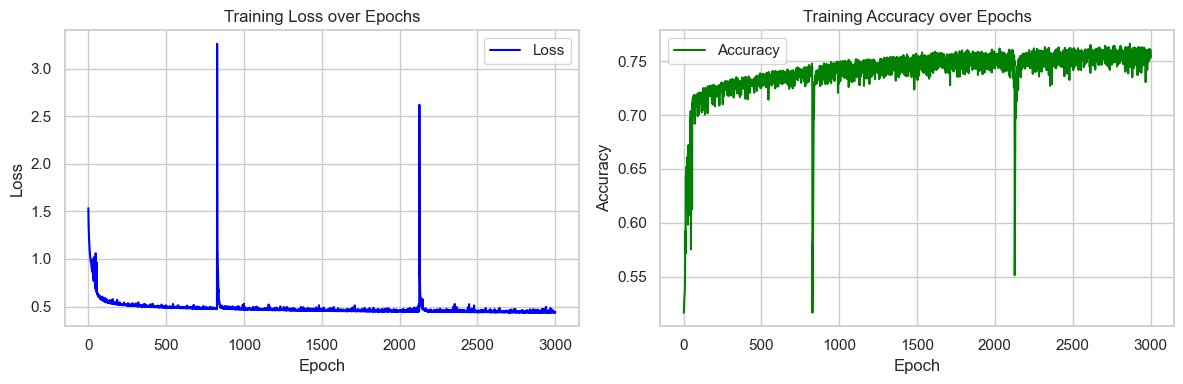

In [161]:
accuracy = mlp_agent_target_model.acc_history_
loss = mlp_agent_target_model.loss_history_

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(1, len(loss) + 1), loss, label='Loss', color='blue')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss over Epochs')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(range(1, len(accuracy) + 1), accuracy, label='Accuracy', color='green')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy over Epochs')
ax[1].grid(True)
ax[1].legend()
plt.tight_layout()
plt.show()

# Pipeline de Inferência e Geração de `submission.csv`

## 1) Features do Conjunto de Teste
Aplica o `preprocessor` ao conjunto de teste para gerar features de tracking e metadados por vídeo.  
Verifica e reporta possíveis valores ausentes.

---

## 2) Criação dos Segmentos
Divide cada vídeo em janelas fixas de frames (`FRAME_WINDOW`) com base na duração estimada.  
Normaliza os frames de início e fim para o intervalo [-1, 1] por vídeo.

---

## 3) Cálculo do Movimento
Para cada segmento, soma o deslocamento das juntas (`movement_*`) entre os frames definidos.  
Normaliza os valores usando as estatísticas do treino e adiciona colunas brutas e escaladas ao dataset.

---

## 4) Montagem das Features
Combina os segmentos com as features globais do vídeo.  
Seleciona colunas numéricas úteis e reordena para o formato esperado pelo MLP, preenchendo ausentes com 0.

---

## 5) Predição de Ação
Usa o modelo MLP de ação para prever `action_id` e converter para o rótulo correspondente.  
Gera colunas `action_*` em formato one-hot para entrada no modelo seguinte.

---

## 6) Predição de Agente e Alvo
Utiliza o segundo MLP para prever o par `agent_and_target`.  
Converte o resultado em `agent_id` e `target_id`, tratando valores ausentes ou inválidos como `mouse0`.

---

## 7) Pós-processamento
Ordena por vídeo e junta segmentos consecutivos com a mesma ação e par agente–alvo.  
Gera identificador sequencial (`row_id`) para cada linha.

---

## 8) Geração do Arquivo Final
Cria o arquivo `submission.csv` com colunas:
`row_id`, `video_id`, `agent_id`, `target_id`, `action`, `start_frame`, `stop_frame`.  
Salva o arquivo final e exibe uma prévia para conferência.

In [162]:
TEST_TRACKING_DIR = DATASET_DIR / 'test_tracking'

test_tracking_features = preprocessor.transform(test_meta)

print('Shape das features de teste:', test_tracking_features.shape)
missing_after_transform = test_tracking_features.isna().any(axis=1).sum()
if missing_after_transform:
    print(f'Aviso: {missing_after_transform} videos com valores faltantes apos a transformacao.')
else:
    print('Sem valores faltantes nas features de teste apos a transformacao.')


Shape das features de teste: (1, 65)
Sem valores faltantes nas features de teste apos a transformacao.


In [163]:
FRAME_WINDOW = 10

video_info_cols = ['lab_id', 'video_id', 'frames_per_second', 'video_duration_sec']
if 'total_frames' in test_meta.columns:
    video_info_cols.append('total_frames')
test_video_info = (
    test_meta[video_info_cols]
    .drop_duplicates(subset=['lab_id', 'video_id'])
    .copy()
)

def _estimate_total_frames(row):
    total = row.get('total_frames') if 'total_frames' in row else np.nan
    if pd.notna(total) and total > 0:
        return int(max(1, round(total)))
    fps = row.get('frames_per_second', np.nan)
    duration = row.get('video_duration_sec', np.nan)
    if pd.notna(fps) and pd.notna(duration):
        estimate = fps * duration
        if pd.notna(estimate) and estimate > 0:
            return int(max(1, round(estimate)))
    return 1

test_video_info['total_frames_est'] = test_video_info.apply(_estimate_total_frames, axis=1)
test_video_info['max_frame_idx'] = (test_video_info['total_frames_est'] - 1).clip(lower=0).astype(int)

segments = []
for _, row in test_video_info.iterrows():
    lab_id = row['lab_id']
    video_id = row['video_id']
    max_frame = int(row['max_frame_idx'])
    start = 0
    stop = min(start + FRAME_WINDOW, max_frame)
    segments.append({'lab_id': lab_id, 'video_id': video_id, 'start_frame': int(start), 'stop_frame': int(stop)})
    start = stop + 1
    while start <= max_frame:
        stop = min(start + FRAME_WINDOW - 1, max_frame)
        segments.append({'lab_id': lab_id, 'video_id': video_id, 'start_frame': int(start), 'stop_frame': int(stop)})
        start = stop + 1

submission_segments = pd.DataFrame(segments)
submission_segments['start_scaled'] = submission_segments.groupby(['lab_id', 'video_id'])['start_frame'].transform(_scale_to_minus_one_plus_one)
submission_segments['stop_scaled'] = submission_segments.groupby(['lab_id', 'video_id'])['stop_frame'].transform(_scale_to_minus_one_plus_one)

segment_movement_test = compute_segment_movement_totals(
    submission_segments,
    TEST_TRACKING_DIR,
    start_col='start_frame',
    stop_col='stop_frame'
)
scaled_segment_test = {}
for col in TRACKING_MOVEMENT_COLUMNS:
    series = segment_movement_test.get(col, pd.Series(np.nan, index=submission_segments.index, dtype=float))
    stats = SEGMENT_MOVEMENT_STATS.get(col, {'fill': 0.0, 'min': 0.0, 'max': 0.0})
    filled = series.fillna(stats.get('fill', 0.0))
    scaled_segment_test[col] = min_max_scale_to_unit_interval(filled, stats.get('min', 0.0), stats.get('max', 0.0))
scaled_segment_test_df = pd.DataFrame(scaled_segment_test, index=submission_segments.index)
scaled_segment_test_df = scaled_segment_test_df.reindex(columns=TRACKING_MOVEMENT_COLUMNS, fill_value=0.0)
submission_segments = submission_segments.join(segment_movement_test.add_prefix('segment_total_raw_'))
submission_segments = submission_segments.join(scaled_segment_test_df.add_prefix('segment_total_scaled_'))

segments_with_features = submission_segments.merge(
    test_tracking_features,
    on=['lab_id', 'video_id'],
    how='left',
    validate='many_to_one',
)

segment_feature_columns = SEGMENT_TRACKING_FEATURE_COLUMNS if SEGMENT_TRACKING_FEATURE_COLUMNS else [c for c in segments_with_features.columns if c.startswith('segment_total_scaled_')]
metadata_feature_columns = METADATA_FEATURE_COLUMNS if METADATA_FEATURE_COLUMNS else [
    c for c in segments_with_features.columns
    if c not in segment_feature_columns
    and c not in ['lab_id', 'video_id', 'start_frame', 'stop_frame']
    and segments_with_features[c].dtype.kind in 'fc'
    and not c.startswith('segment_total_raw_')
]
action_input_df = pd.concat(
    [
        submission_segments[['start_scaled', 'stop_scaled']].rename(columns={'start_scaled': 'start_frame', 'stop_scaled': 'stop_frame'}),
        segments_with_features[metadata_feature_columns],
        segments_with_features[segment_feature_columns],
    ],
    axis=1,
)
action_input_df = action_input_df.loc[:, ~action_input_df.columns.duplicated()]
action_input_df = action_input_df.reindex(columns=mlp_feature_columns, fill_value=0.0)
X_action_infer = action_input_df.to_numpy(dtype=np.float64)

action_pred_ids = mlp_action_model.predict(X_action_infer)
pred_actions = [action_id_to_label[int(idx)] for idx in action_pred_ids]
pred_actions_cat = pd.Categorical(pred_actions, categories=action_categories)
action_one_hot_columns = [col for col in mlp_pair_feature_columns if col.startswith('action_')]
action_one_hot_pred = pd.get_dummies(pred_actions_cat, prefix='action').reindex(columns=action_one_hot_columns, fill_value=0.0)

pair_input_df = pd.concat(
    [
        submission_segments[['start_scaled', 'stop_scaled']].rename(columns={'start_scaled': 'start_frame', 'stop_scaled': 'stop_frame'}),
        segments_with_features[metadata_feature_columns],
        segments_with_features[segment_feature_columns],
        action_one_hot_pred,
    ],
    axis=1,
)
pair_input_df = pair_input_df.loc[:, ~pair_input_df.columns.duplicated()]
pair_input_df = pair_input_df.reindex(columns=mlp_pair_feature_columns, fill_value=0.0)
X_pair_infer = pair_input_df.to_numpy(dtype=np.float64)

agent_target_pred_ids = mlp_agent_target_model.predict(X_pair_infer)
pred_agent_target_labels = [agent_target_id_to_label[int(idx)] for idx in agent_target_pred_ids]

agent_ids = []
target_ids = []
for label in pred_agent_target_labels:
    if label in {'missing', '__missing__'}:
        agent_ids.append('mouse0')
        target_ids.append('mouse0')
        continue
    digits = [int(ch) for ch in str(label) if ch.isdigit()]
    if len(digits) >= 2:
        agent_ids.append(f'mouse{digits[0]}')
        target_ids.append(f'mouse{digits[1]}')
    else:
        agent_ids.append('mouse0')
        target_ids.append('mouse0')

submission_df = submission_segments[['video_id', 'start_frame', 'stop_frame']].copy()
submission_df['action'] = pred_actions
submission_df['agent_id'] = agent_ids
submission_df['target_id'] = target_ids

submission_df = submission_df.sort_values(['video_id', 'start_frame']).reset_index(drop=True)
merged_rows = []
for row in submission_df.itertuples(index=False):
    if not merged_rows:
        merged_rows.append({
            'video_id': row.video_id,
            'start_frame': int(row.start_frame),
            'stop_frame': int(row.stop_frame),
            'action': row.action,
            'agent_id': row.agent_id,
            'target_id': row.target_id,
        })
        continue
    last = merged_rows[-1]
    if (
        row.video_id == last['video_id']
        and row.action == last['action']
        and str(row.agent_id) == str(last['agent_id'])
        and str(row.target_id) == str(last['target_id'])
        and int(row.start_frame) <= last['stop_frame'] + 1
    ):
        last['stop_frame'] = max(last['stop_frame'], int(row.stop_frame))
    else:
        merged_rows.append({
            'video_id': row.video_id,
            'start_frame': int(row.start_frame),
            'stop_frame': int(row.stop_frame),
            'action': row.action,
            'agent_id': row.agent_id,
            'target_id': row.target_id,
        })
submission_df = pd.DataFrame(merged_rows)
submission_df['row_id'] = np.arange(len(submission_df), dtype=int)
submission_df = submission_df[['row_id', 'video_id', 'agent_id', 'target_id', 'action', 'start_frame', 'stop_frame']]

print('Dataset de submissao gerado com', len(submission_df), 'linhas.')
display(submission_df.head(50))
submission_df.to_csv('submission.csv', index=False)


Dataset de submissao gerado com 462 linhas.


,row_id,video_id,agent_id,target_id,action,start_frame,stop_frame
0,0,438887472,mouse2,mouse2,rear,0,920
1,1,438887472,mouse2,mouse3,approach,921,930
2,2,438887472,mouse3,mouse3,rear,931,940
3,3,438887472,mouse2,mouse2,rear,941,1180
4,4,438887472,mouse3,mouse3,rear,1181,1190
5,5,438887472,mouse2,mouse2,rear,1191,1380
6,6,438887472,mouse3,mouse3,rear,1381,1390
7,7,438887472,mouse2,mouse2,rear,1391,1460
8,8,438887472,mouse3,mouse3,rear,1461,1470
9,9,438887472,mouse2,mouse2,rear,1471,1780


# Considerações Finais

O dataset escolhido e problema proposto pela competição exigiu uma pipeline complexa e diversos tratamentos dos dados para conseguir chegar a um resultado viável e plausível de modelo para a competição, porém existe muito que pode ser melhorado e trabalhado para evolução desse modelo, sem contar implementações diretas na arquitetura MLP.

- **Relação Temporal**

O modelo feito define valores arbitrarios para todos os frames de um vídeo e prevê uma ação específica para cada intervalo de frames definido, porém na estrutura dos datasets existem casos com mais de uma ação no mesmo frame envolvendo diferentes agentes e casos com nenhuma ação em um frame.

- **Predição de Ação Nula**

Essa implementação poderia ser realizada de maneira mais simples, adicionando como feature de ação possível a ação nula para frames que não possuem uma ação vinculada, permitindo que essas fossem também preditas pelo modelo e os resultados do modelo, por conseguinte, seriam também mais coerentes.

- **Melhoria dos Modelos Base**

Existe muito espaço para melhora no modelo padrão de predição de ação por frame, o que poderia incluir desde melhoria de hiperparâmetros até tratamento de dados e geração de novas features, como cálculo de distância de juntas específicas no intervalo de frames. Uma melhor forma de lidar com o desbalanceamento da base sem perder tantos dados também poderia ser crucial na realização de um modelo superior.